# <b><span style='color:#e61227'></span> Credit Risk Management - Project Assignment 2023/2024 | Default Probability Prediction
### Logistic Regression | Machine Learning | Deep Learning

## Authors:
- Luís Ribeiro (nº 20231536)
- Renato Morais (nº 20231135)
- Fernando Tiago (nº 20231535)
- Thiago Bellas (nº 20231131)
- Saad Islam (nº 20230513)

  </b>


## <b>1 <span style='color:#e61227'>|</span> Introduction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.1 |</span></b> Why do we need this study?</b></p>
</div>

TEXT

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.2 |</span></b> Problem Statement</b></p>
</div>

TEXT

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Study Aim</b></p>
</div>

TEXT

## <b>2 <span style='color:#e61227'>|</span> Project Enviroment, Dataset Load and Setup</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Packages and Variables Description</b></p>
</div>



In [1]:
# import the required libraries to the initial step
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time

# Handling with warnings and hide outputs from pandas
%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

C:\Users\rluis\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## <b>3 <span style='color:#e61227'>|</span>  Preliminary exploratory and statistical analysis of the dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:100%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Loading files</b></p>
</div>

In [2]:
# Loans data
train_validation_kaggle = pd.read_csv('train_validation_kaggle.csv', encoding='ISO-8859-1')

unseen_kaggle = pd.read_csv('unseen_kaggle.csv', encoding='ISO-8859-1')

In [3]:
train_validation_kaggle_independents = train_validation_kaggle.drop(["id","risk"],axis=1)
train_validation_kaggle_independents

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status
0,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,debt_consolidation,CA,30.46,0,Jan-12,0.0,11,1,15603,37.0,19,0.00,30026.442500,Fully Paid
1,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,credit_card,OH,50.53,0,Jun-09,0.0,18,0,34971,64.5,37,0.00,40856.678960,Fully Paid
2,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,credit_card,WA,18.92,0,Feb-99,0.0,9,0,25416,29.9,19,0.00,20215.792430,Fully Paid
3,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-18,credit_card,TX,4.64,0,Dec-03,0.0,12,0,4472,15.3,25,0.00,4549.217149,Fully Paid
4,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-18,credit_card,MA,12.37,0,Oct-97,0.0,21,0,36812,65.7,37,0.00,8735.148975,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310699,25000,25000,25000.0,36 months,16.99,891.20,D,Analyst,2 years,MORTGAGE,90000.0,Not Verified,Oct-15,moving,MD,3.19,3,Nov-98,0.0,3,0,1946,59.0,12,34.00,6201.430000,Late (31-120 days)
310700,24825,24825,24825.0,36 months,16.55,879.53,D,DENTIST,1 year,RENT,252000.0,Source Verified,Oct-15,debt_consolidation,TN,24.26,0,Nov-97,3.0,15,0,15745,48.4,34,10888.40,17769.660000,Late (31-120 days)
310701,19650,19650,19650.0,60 months,13.33,450.43,C,Director,10+ years,OWN,95000.0,Verified,Oct-15,debt_consolidation,NC,18.56,0,Aug-96,0.0,11,0,34256,85.0,26,7840.58,15088.780000,Late (31-120 days)
310702,31200,31200,31200.0,60 months,19.99,826.44,E,Certified Occupational Therapy Assistant,< 1 year,OWN,65000.0,Source Verified,Oct-15,debt_consolidation,CA,20.62,0,Apr-01,1.0,6,0,7261,71.2,8,10251.72,18602.730000,Late (31-120 days)


In [4]:
train_validation_kaggle_independents = train_validation_kaggle.drop(["id","risk"],axis=1)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:100%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Exploratory data analysis</b></p>
</div>

In this part we are going to briefly go through our datasets variables and have a quick look on how all of them shape up

In [5]:
train_validation_kaggle_independents.shape

(310704, 27)

As we can see our dataset has 27 variables, the number of variables will be reduced in a later part but for now lets go through all of them

#### Loan Amounts

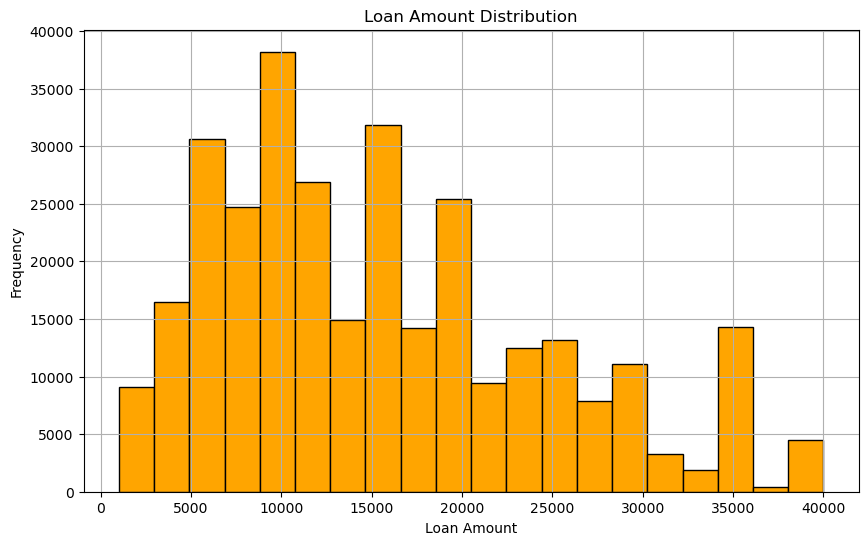

In [6]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(train_validation_kaggle_independents['loan_amnt'], bins=20, color='orange', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
train_validation_kaggle_independents['loan_amnt'].nunique()

1522

The dataset comprises 1522 loan amounts, showcasing a diverse range of borrowing figures. Upon analysis, it's evident that the majority of borrowers tend to request loans falling within the range of $5000 to $20000. This is expected as the loan amount requested will always vary since this is a reflection of the clients needs.

#### Funded Amount

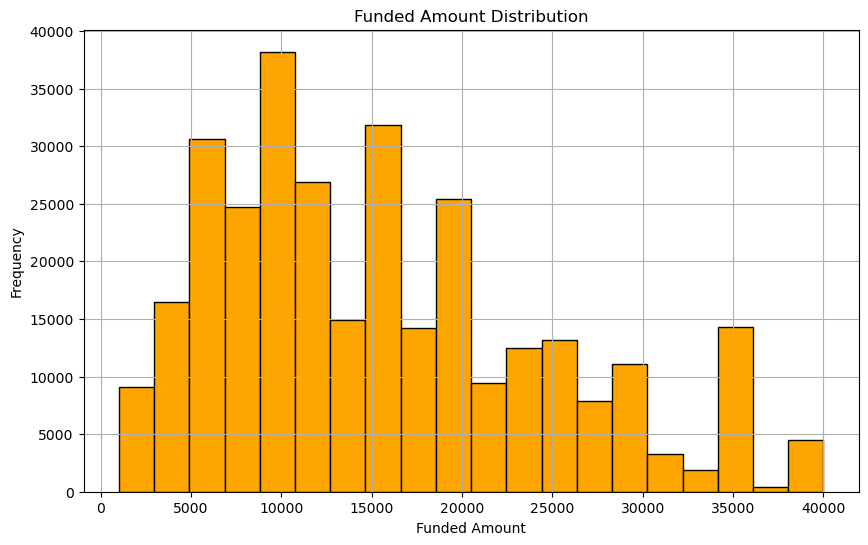

In [8]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(train_validation_kaggle_independents['funded_amnt'], bins=20, color='orange', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
train_validation_kaggle_independents['funded_amnt'].nunique()

1522

The dataset consists of 1522 unique funded amounts, reflecting a spectrum of financial disbursements made to borrowers. Upon examination, it's discernible that a significant proportion of borrowers opt for funded amounts ranging between $5000 and $20000. This range emerges as the focal point of funding disbursements, indicating a prevalent preference among borrowers. This variation in funded amounts is natural and expected, as it reflects the diverse financial needs and requirements of the clientele served by the dataset

#### Funded Amount by Investors

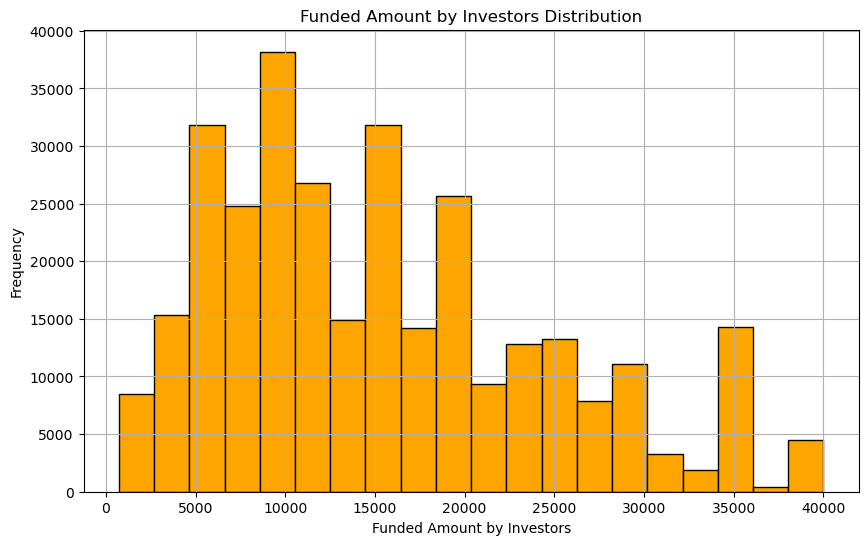

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(train_validation_kaggle_independents['funded_amnt_inv'], bins=20, color='orange', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Funded Amount by Investors Distribution')
plt.xlabel('Funded Amount by Investors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
train_validation_kaggle_independents['funded_amnt_inv'].nunique()

1542

The dataset encompasses funded amounts by investors, comprising 1542 distinct values that denote the financial disbursements made by various investors. Upon analysis, it becomes apparent that the funded amounts exhibit a wide-ranging distribution, indicative of the diverse investment preferences and strategies employed by investors. Notably, a significant proportion of funding falls within the range of $5000 to $20000, underscoring a prevalent trend among investors. This variability in funded amounts underscores the dynamic nature of investment decisions, reflecting the unique objectives and risk appetites of individual investors contributing to the dataset.

#### Term

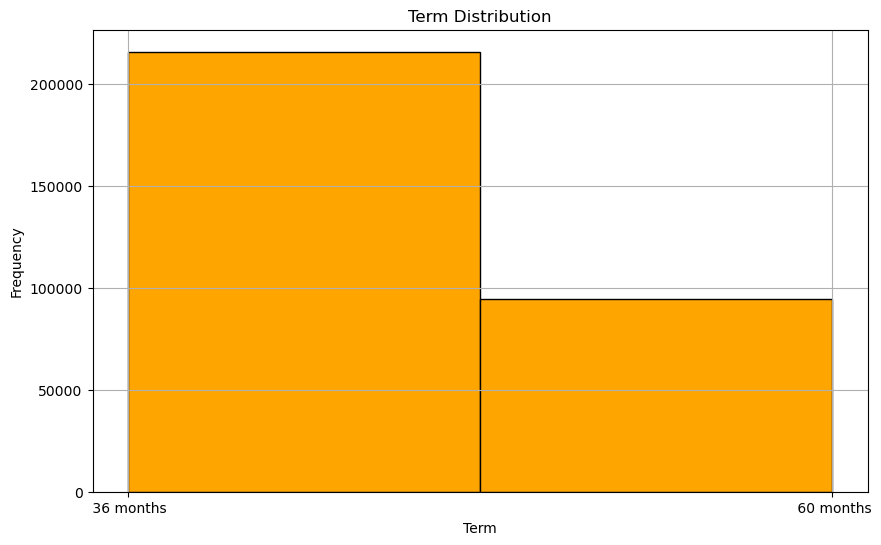

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['term'], bins=2, color='orange', edgecolor='black')
plt.title('Term Distribution')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
train_validation_kaggle_independents['term'].nunique()

2

The dataset includes loan terms, with 2 distinct values indicating the duration of loans offered. Upon analysis, it's evident that the loan terms exhibit a clear disparity, with one term being significantly more prevalent than the other. Specifically, the 36-month term emerges as the dominant choice among borrowers, showcasing a higher concentration within this category. This preference for the 36-month term underscores a common trend among borrowers, likely driven by factors such as affordability and loan repayment considerations. The presence of two distinct terms highlights the flexibility in loan options provided to borrowers, catering to diverse financial needs and preferences.

#### Interest Rate

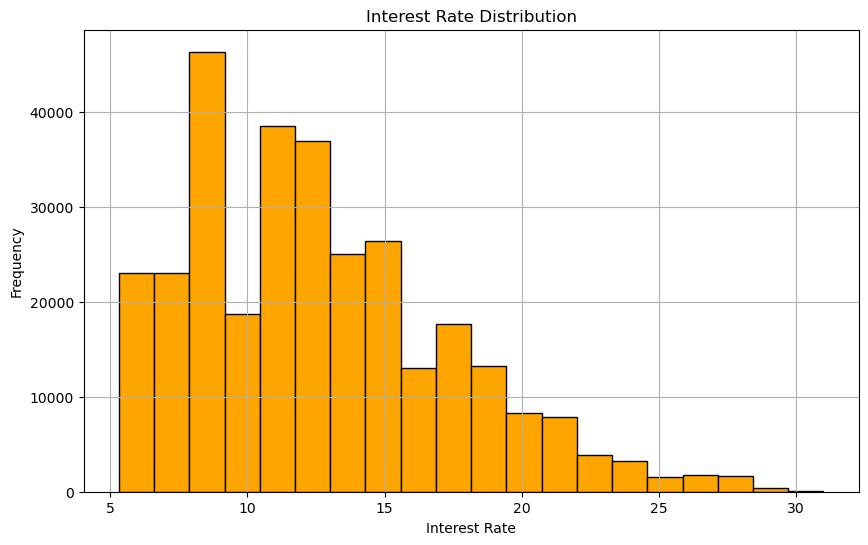

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['int_rate'], bins=20, color='orange', edgecolor='black')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
train_validation_kaggle_independents['int_rate'].nunique()

150

In [16]:
train_validation_kaggle_independents['int_rate'].value_counts()

int_rate
5.32     10765
7.89      9468
11.99     9252
13.67     9191
9.17      7231
         ...  
15.29        2
30.89        2
15.59        1
11.16        1
16.90        1
Name: count, Length: 150, dtype: int64

The dataset contains interest rates applied to loans, with 150 unique values reflecting the varying rates offered to borrowers. Upon analysis, it's notable that the distribution of interest rates is diverse, encompassing a wide range of values. However, a few specific rates emerge with higher frequencies, indicating a concentration of borrowers opting for these rates. Notably, the most common interest rates are 5.32%, 7.89%, and 9252% in descending order of occurrence. This pattern suggests that these rates are particularly attractive or commonly offered to borrowers within the dataset. The presence of diverse interest rates underscores the flexibility in loan pricing strategies employed by lenders, catering to the diverse financial circumstances and risk profiles of borrowers.

#### Installment

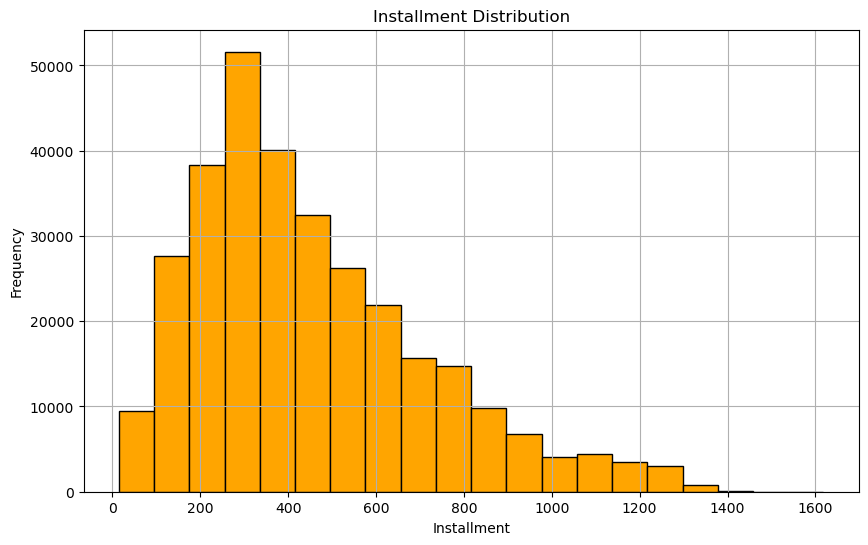

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['installment'], bins=20, color='orange', edgecolor='black')
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
train_validation_kaggle_independents['installment'].nunique()

37954

The dataset encompasses installment amounts, representing the periodic payments made by borrowers to repay their loans. With a vast range of 37,954 unique values, the installment amounts exhibit a diverse distribution, reflecting the varying repayment obligations undertaken by borrowers. The extensive array of installment values underscores the granularity in loan repayment schedules, accommodating a wide spectrum of borrowing needs and financial capacities among borrowers. This diversity in installment amounts highlights the flexibility and customization options available in loan terms, enabling borrowers to select installment plans tailored to their individual financial circumstances and preferences.

#### Grade

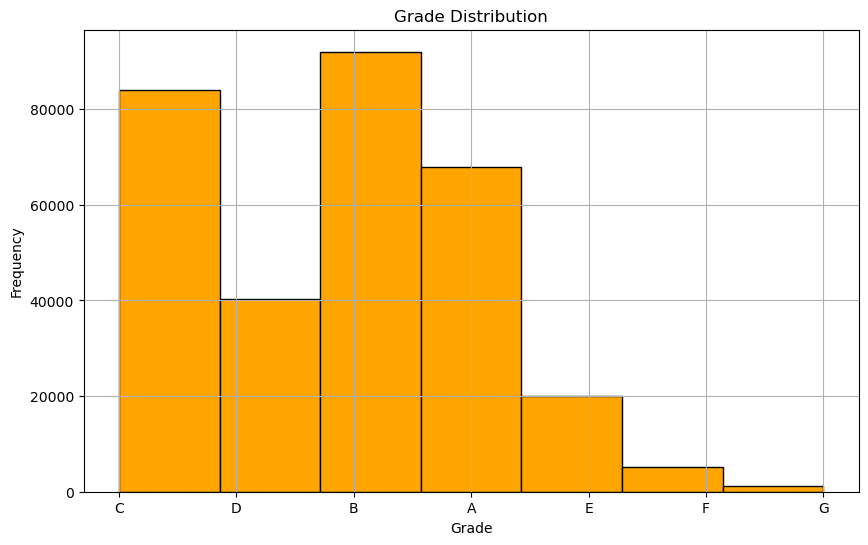

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['grade'], bins=7, color='orange', edgecolor='black')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
train_validation_kaggle_independents['grade'].nunique()

7

The dataset comprises loan grades, categorized into 7 unique values representing the credit quality assigned to borrowers. Upon analysis, it's evident that the distribution of loan grades varies, with one grade standing out as the most prevalent. Specifically, grade B emerges as the dominant category, exhibiting the highest frequency among borrowers. This prevalence of grade B loans suggests a significant portion of borrowers falls within this intermediate credit quality tier. The presence of multiple grade categories underscores the granularity in assessing borrower creditworthiness, allowing lenders to tailor loan terms and interest rates based on risk profiles. Grade B's prominence indicates a substantial segment of borrowers with moderate credit risk, reflecting a common profile among individuals seeking financing within the dataset

#### Employment Title

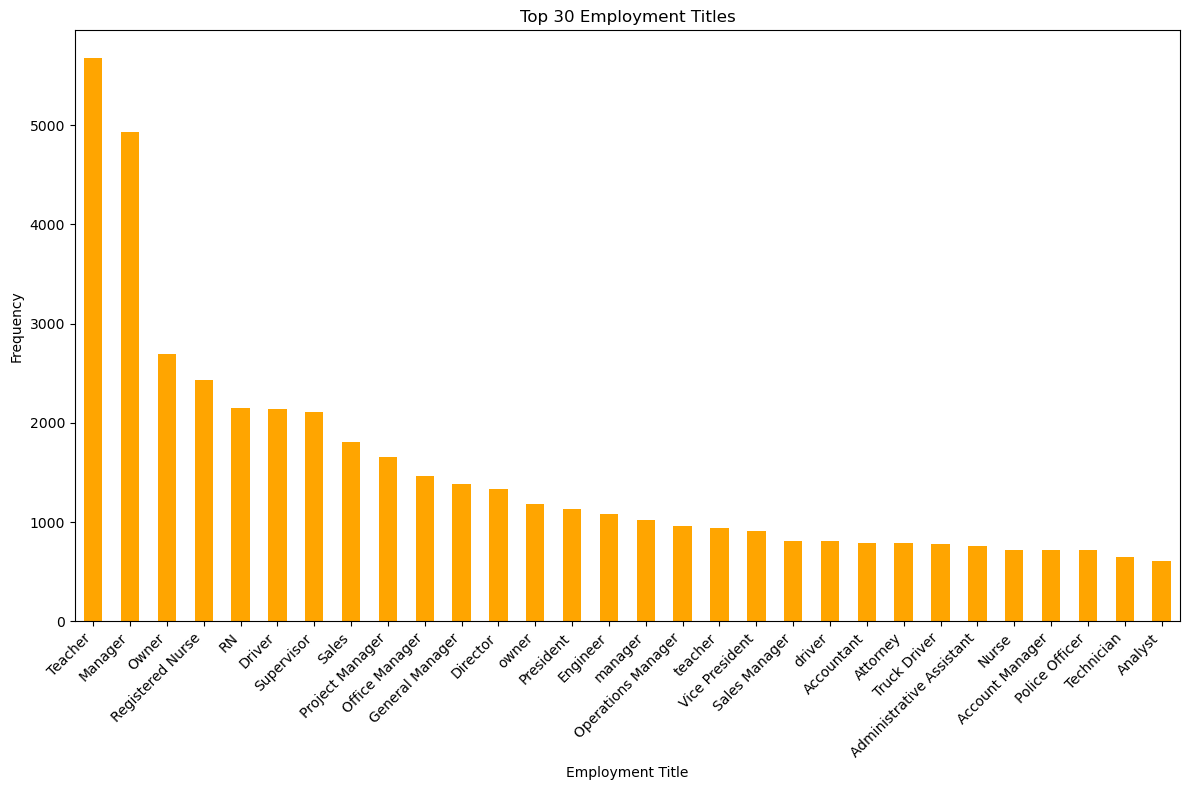

In [21]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['emp_title'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Employment Titles')
plt.xlabel('Employment Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
train_validation_kaggle_independents['emp_title'].nunique()

91590

The dataset includes employment titles, reflecting the diverse occupations held by borrowers. With a range of unique values, the distribution of employment titles highlights the varied professional backgrounds represented in the borrower pool. While specific titles may vary widely, they collectively provide insight into the occupational diversity among loan applicants. This diversity in employment titles underscores the heterogeneous nature of borrowers' employment profiles, reflecting the wide array of individuals seeking financial assistance within the dataset.

#### Employment Length

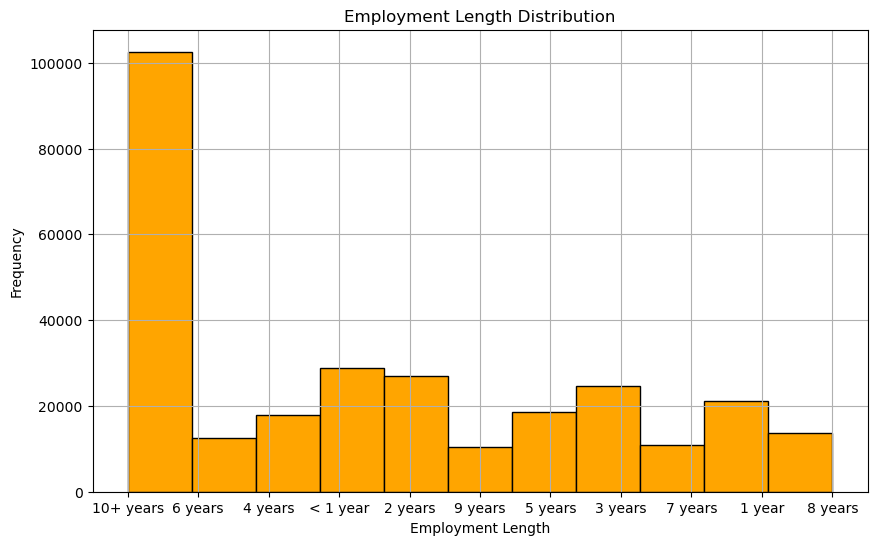

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['emp_length'].dropna(), bins=11, color='orange', edgecolor='black')
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
train_validation_kaggle_independents['emp_length'].nunique()

11

The dataset comprises employment lengths, categorized into various durations representing borrowers' job tenures. Notably, the highest value count is observed in the category '10+ years,' indicating a prevalent trend among borrowers with long-standing employment histories. This dominance of borrowers with extensive work experience underscores the stability and reliability often associated with longer-tenured employees seeking financial assistance. The presence of diverse employment length categories reflects the varied career stages and professional backgrounds represented within the borrower population.

#### Home Ownership

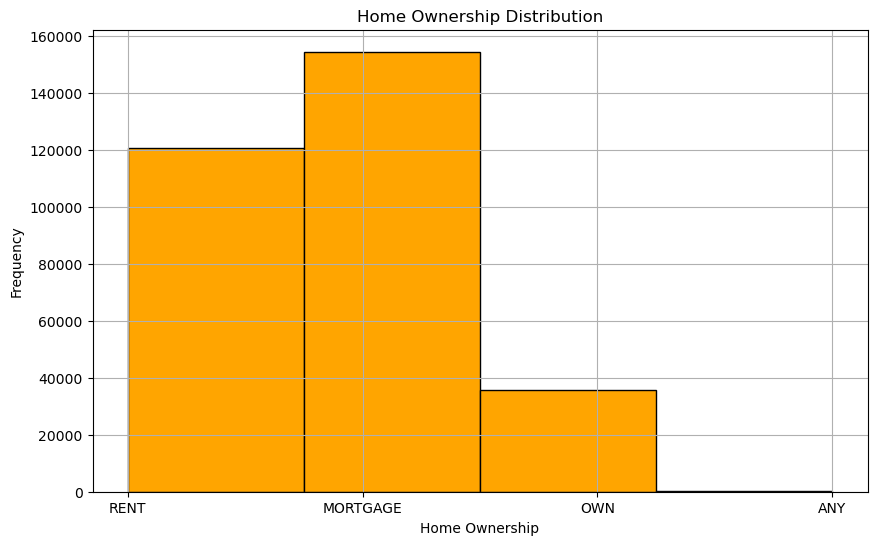

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['home_ownership'], bins=4, color='orange', edgecolor='black')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
train_validation_kaggle_independents['home_ownership'].nunique()

4

The dataset includes home ownership status, categorized into different types representing borrowers' housing situations. Notably, the highest value count is observed in the 'mortgage' category, indicating a prevalent trend among borrowers who own homes with mortgages. This dominance of mortgage holders suggests a significant portion of borrowers have invested in homeownership with the assistance of mortgage financing. The presence of diverse home ownership categories reflects the varied housing arrangements and financial backgrounds represented within the borrower population.

#### Annual Income

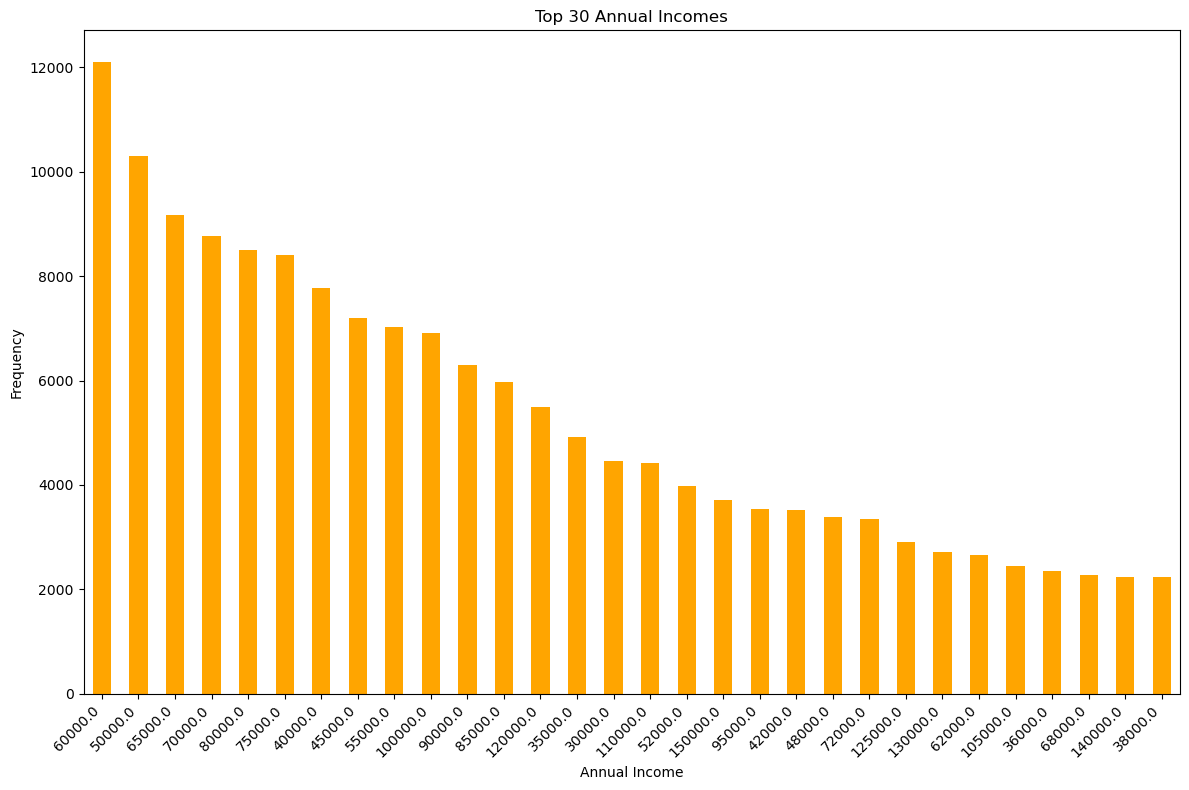

In [27]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['annual_inc'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Annual Incomes')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
train_validation_kaggle_independents['annual_inc'].nunique()

20880

In [29]:
train_validation_kaggle_independents['annual_inc'].value_counts().head(30)

annual_inc
60000.0     12104
50000.0     10305
65000.0      9170
70000.0      8771
80000.0      8510
75000.0      8412
40000.0      7780
45000.0      7198
55000.0      7026
100000.0     6905
90000.0      6289
85000.0      5978
120000.0     5487
35000.0      4928
30000.0      4468
110000.0     4425
52000.0      3984
150000.0     3715
95000.0      3538
42000.0      3520
48000.0      3380
72000.0      3345
125000.0     2913
130000.0     2724
62000.0      2668
105000.0     2441
36000.0      2352
68000.0      2267
140000.0     2243
38000.0      2231
Name: count, dtype: int64

The dataset contains annual income data, representing the earnings reported by borrowers. Notably, the three highest value counts are observed in the income brackets of 60,000 USD, 50,000 USD, and 65,000 USD. This distribution highlights common income levels among borrowers, with a significant proportion reporting earnings within these ranges. The presence of diverse income levels underscores the financial diversity within the borrower population, reflecting a range of income earners seeking financial assistance.

#### Verification Status

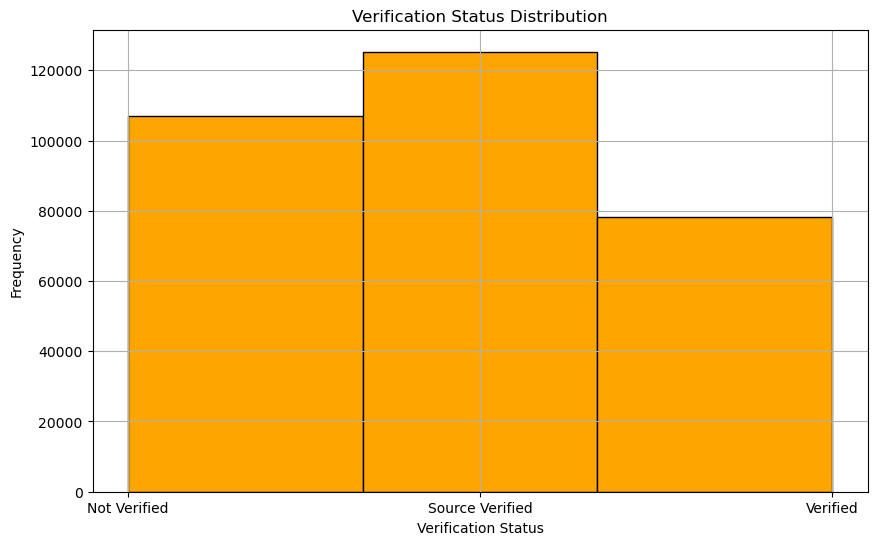

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['verification_status'], bins=3, color='orange', edgecolor='black')
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
train_validation_kaggle_independents['verification_status'].nunique()

3

The dataset includes verification statuses, indicating the verification status of borrower information. Notably, one status stands out with the highest count, reflecting a prevalent trend among borrowers whose information has been verified. This emphasis on verified information underscores the importance of transparency and reliability in the lending process, ensuring confidence in borrower data used for loan decisions.

#### Issue Date

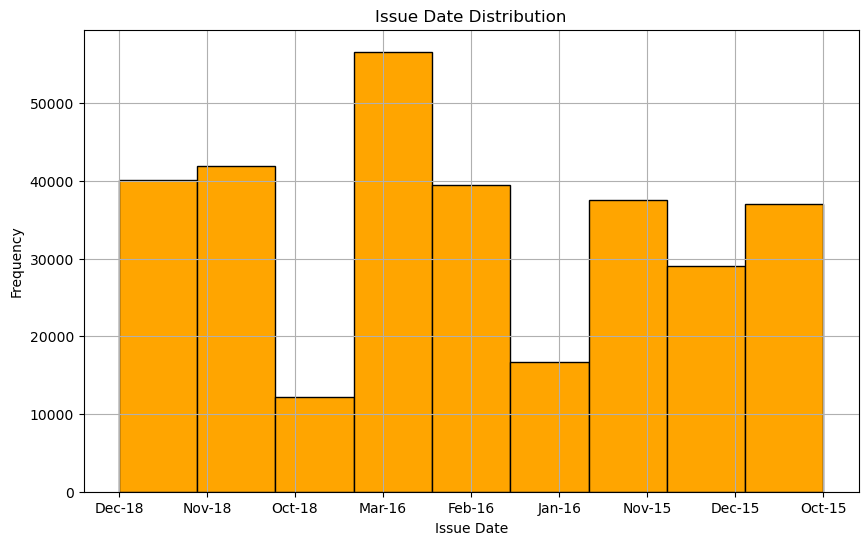

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['issue_d'], bins=9, color='orange', edgecolor='black')
plt.title('Issue Date Distribution')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
train_validation_kaggle_independents['issue_d'].nunique()

9

The dataset encompasses issue dates, denoting the dates when loans were issued. Notably, each issue date reflects a unique point in time when borrowers obtained financing. By analyzing the distribution of issue dates, we gain insights into the temporal patterns of loan issuance. This temporal perspective allows us to understand trends and variations in lending activity over time, reflecting the dynamic nature of the loan origination process.

#### Purpose

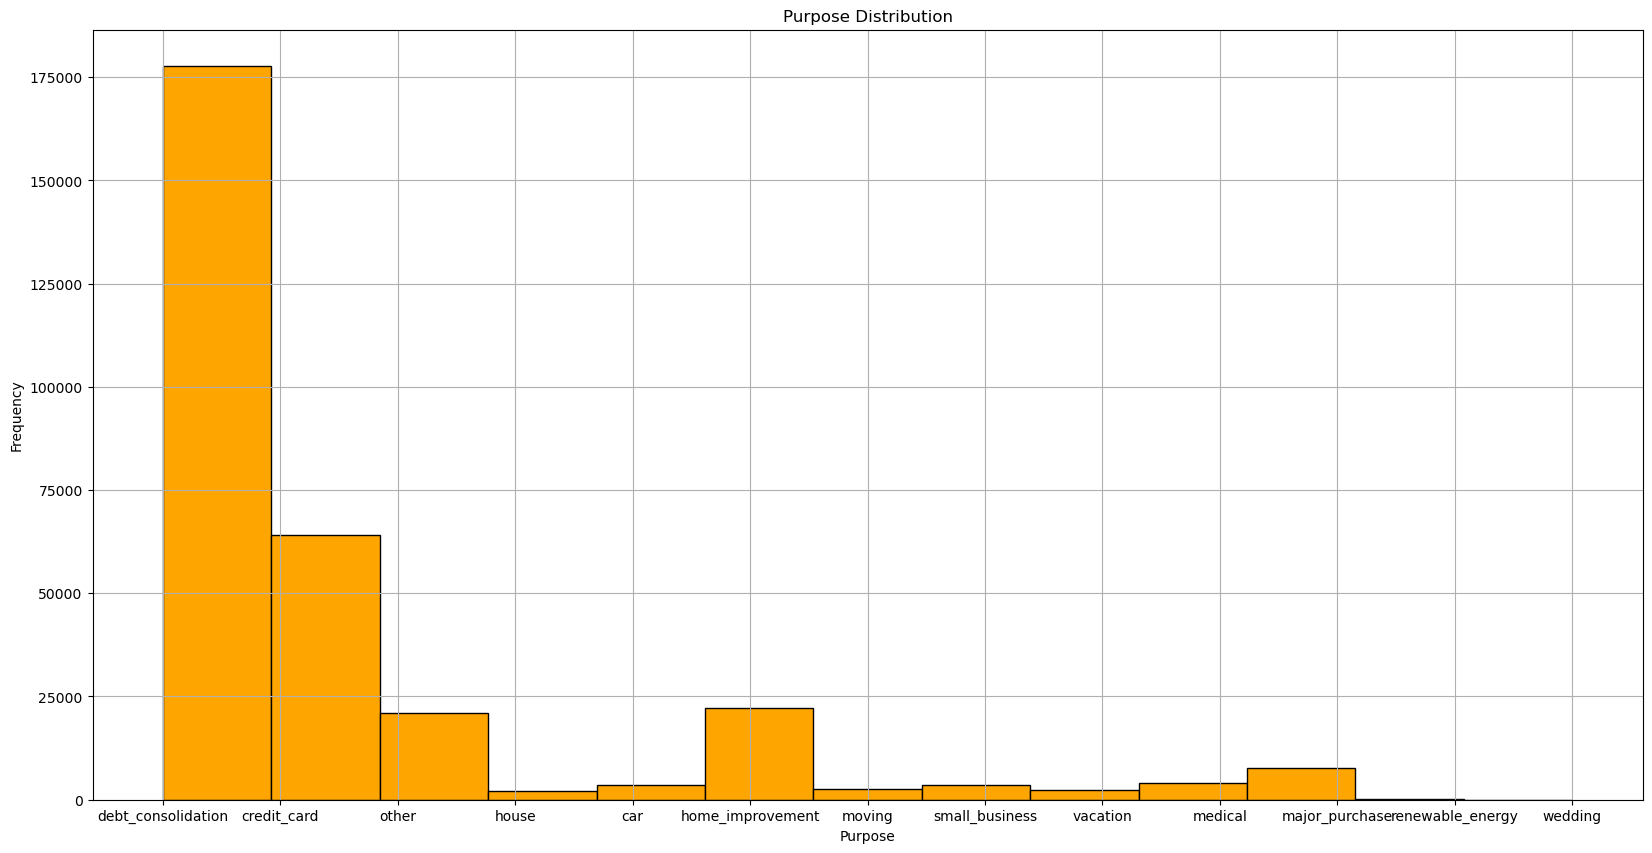

In [34]:
plt.figure(figsize=(20, 10))
plt.hist(train_validation_kaggle_independents['purpose'], bins=13, color='orange', edgecolor='black')
plt.title('Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
train_validation_kaggle_independents['purpose'].nunique()

13

The dataset includes loan purposes, representing the reasons borrowers seek financing. Notably, each purpose category denotes a unique financial objective driving loan applications. By examining the distribution of loan purposes, we gain insight into the diverse motivations behind borrowing. This understanding of borrower intentions informs lenders about the varied needs and priorities of individuals seeking financial assistance.

#### Address State

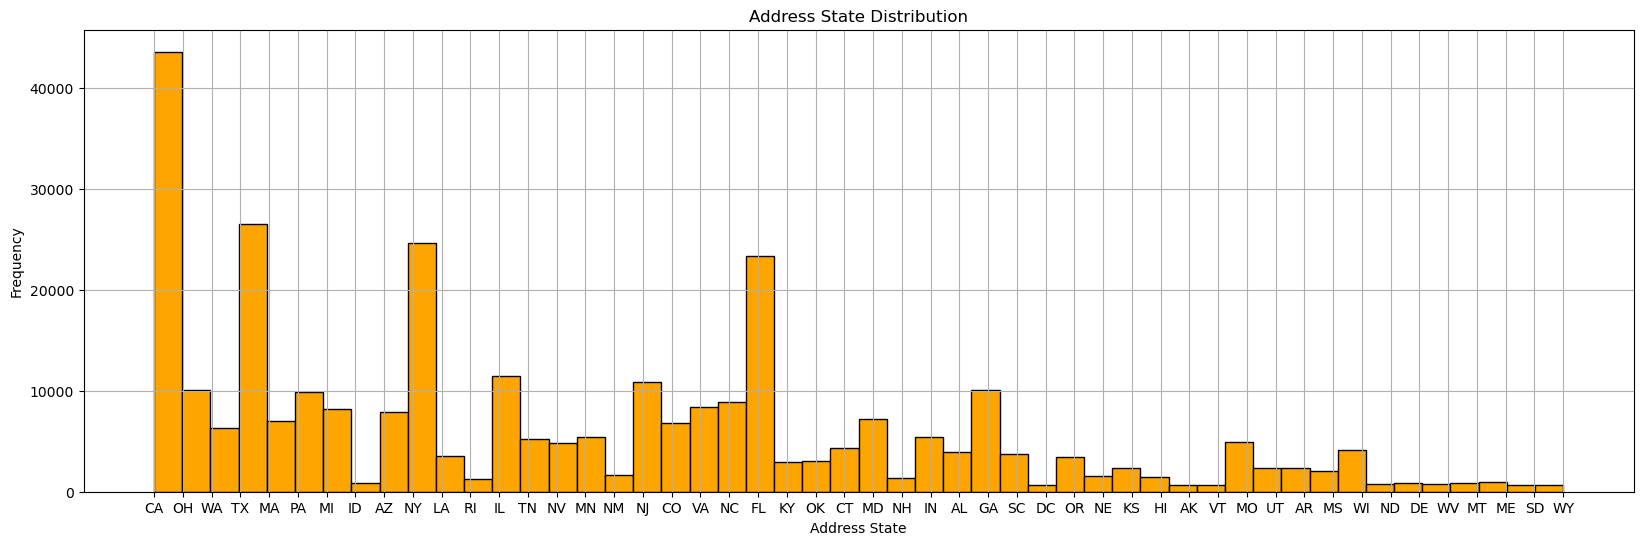

In [36]:
plt.figure(figsize=(20, 6))
plt.hist(train_validation_kaggle_independents['addr_state'], bins=50, color='orange', edgecolor='black')
plt.title('Address State Distribution')
plt.xlabel('Address State')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
train_validation_kaggle_independents['addr_state'].nunique()

50

The dataset contains borrower addresses, categorized by state. Notably, each state represents a geographical location where borrowers reside. Analyzing the distribution of addresses by state provides insights into the regional representation of borrowers. This geographical perspective allows us to understand the distribution of loan applicants across different states, reflecting the diverse geographic reach of the lending market.

#### Debt to Income Ratio

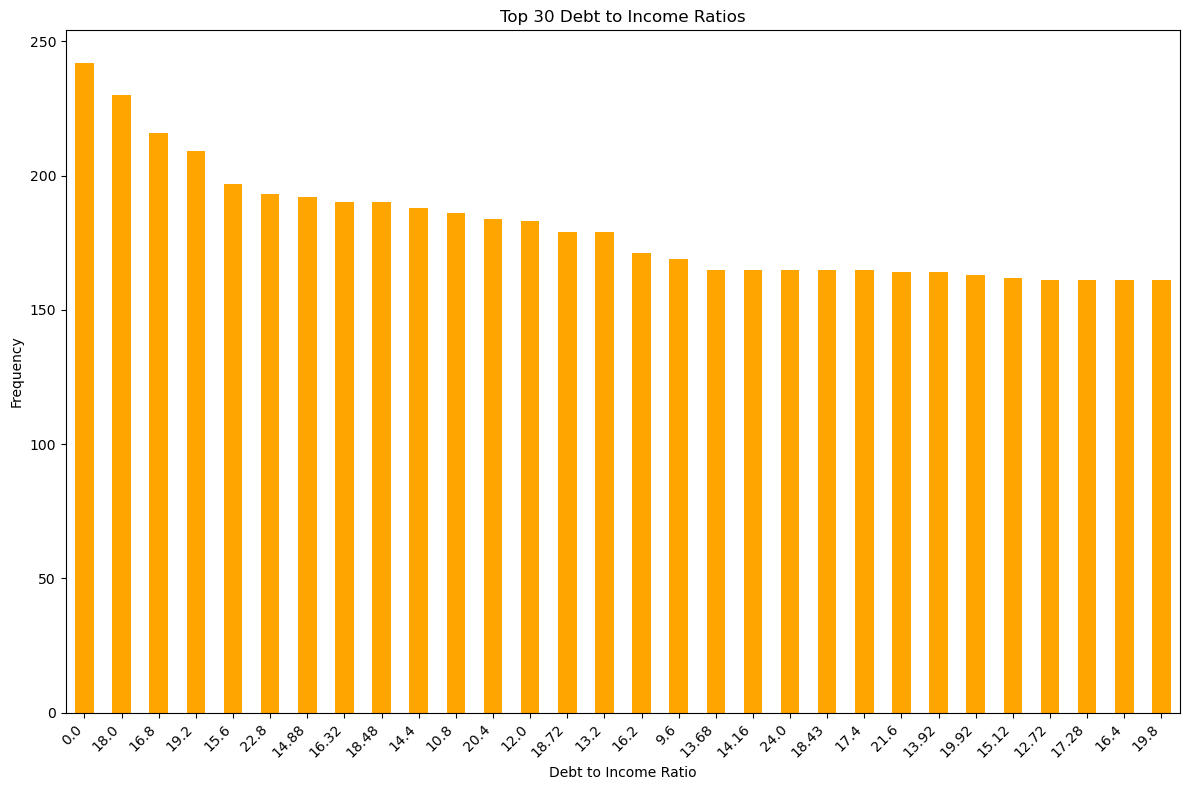

In [38]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['dti'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Debt to Income Ratios')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
train_validation_kaggle_independents['dti'].nunique()

5835

The dataset includes debt-to-income ratios (DTI), representing the ratio of borrowers' debt obligations to their income. Notably, each DTI value provides insight into borrowers' financial health and ability to manage debt. Analyzing the distribution of DTI ratios allows lenders to assess borrowers' debt burdens relative to their income levels. This evaluation helps inform lending decisions, ensuring loans are issued responsibly based on borrowers' financial capabilities.

#### Deliquencies in the last 2 years

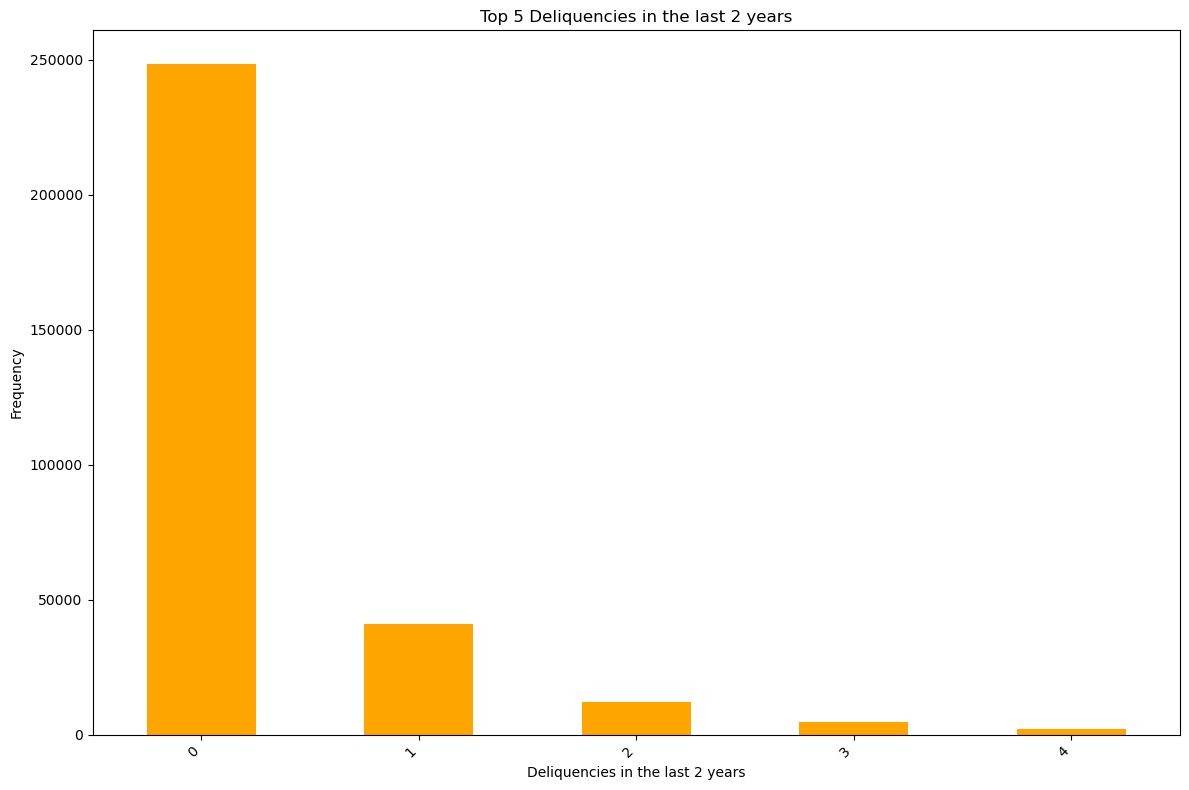

In [40]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['delinq_2yrs'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title('Top 5 Deliquencies in the last 2 years')
plt.xlabel('Deliquencies in the last 2 years')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
train_validation_kaggle_independents['delinq_2yrs'].nunique()

22

The dataset contains information on borrowers' delinquencies in the last 2 years, indicating instances of late payments or defaults within this timeframe. Notably, each delinquency entry reflects a past occurrence of payment failure. Analyzing the distribution of delinquencies provides insight into borrowers' payment behavior and credit risk. This assessment helps lenders gauge the likelihood of future payment defaults and make informed decisions regarding loan approvals and terms.

#### Earliest Credit Line

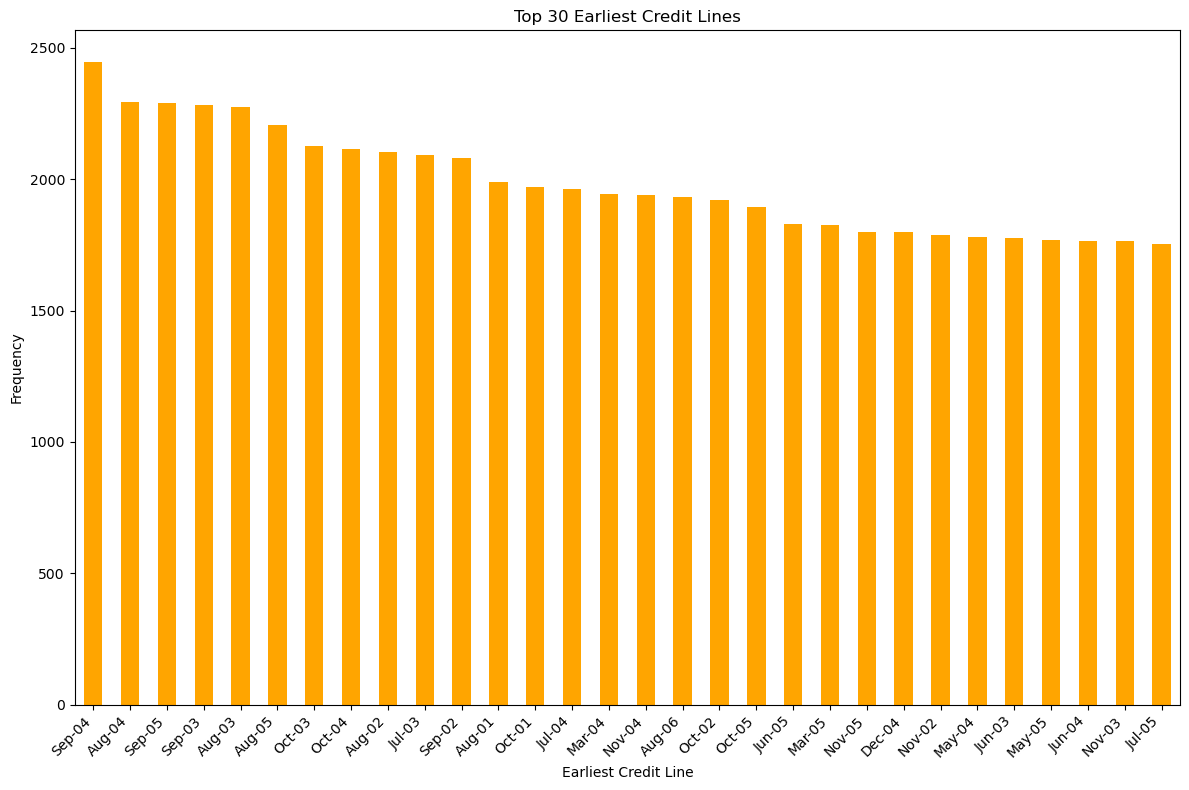

In [42]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['earliest_cr_line'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Earliest Credit Lines')
plt.xlabel('Earliest Credit Line')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
train_validation_kaggle_independents['earliest_cr_line'].nunique()

682

The dataset includes the dates of borrowers' earliest credit lines, representing the inception dates of their credit histories. Each entry reflects the initiation of credit activity for individual borrowers. Analyzing the distribution of earliest credit lines provides insight into the duration of borrowers' credit histories. This historical perspective helps lenders assess borrowers' creditworthiness and financial stability, informing lending decisions and risk management strategies.

#### Inqueries in the last 6 months

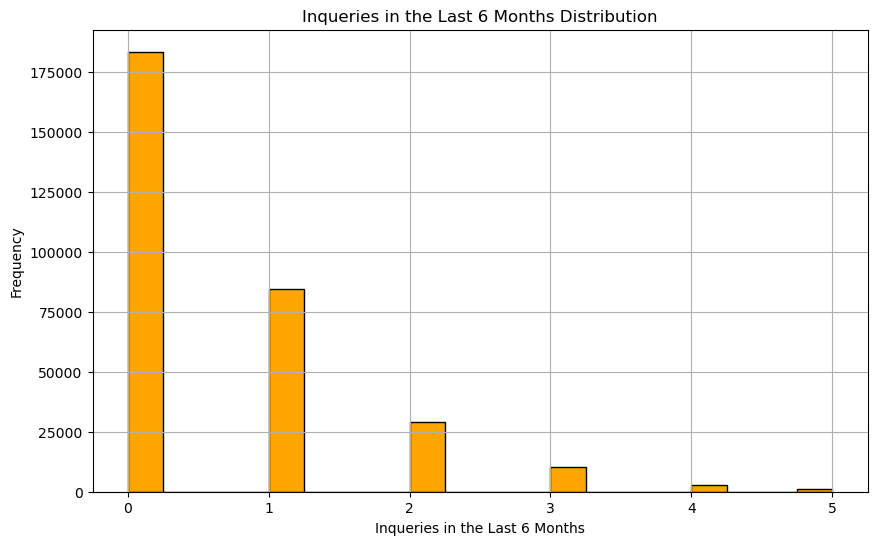

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['inq_last_6mths'], bins=20, color='orange', edgecolor='black')
plt.title('Inqueries in the Last 6 Months Distribution')
plt.xlabel('Inqueries in the Last 6 Months')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
train_validation_kaggle_independents['inq_last_6mths'].nunique()

6

The dataset contains information on inquiries made on borrowers' credit reports within the last 6 months, indicating recent requests for credit information. Each entry represents an inquiry made by lenders or creditors to assess borrowers' creditworthiness. Analyzing the distribution of inquiries provides insight into the level of recent credit activity and borrower engagement with credit markets. This assessment helps lenders evaluate the potential impact of recent credit inquiries on borrowers' credit profiles and lending decisions.

#### Open Accounts

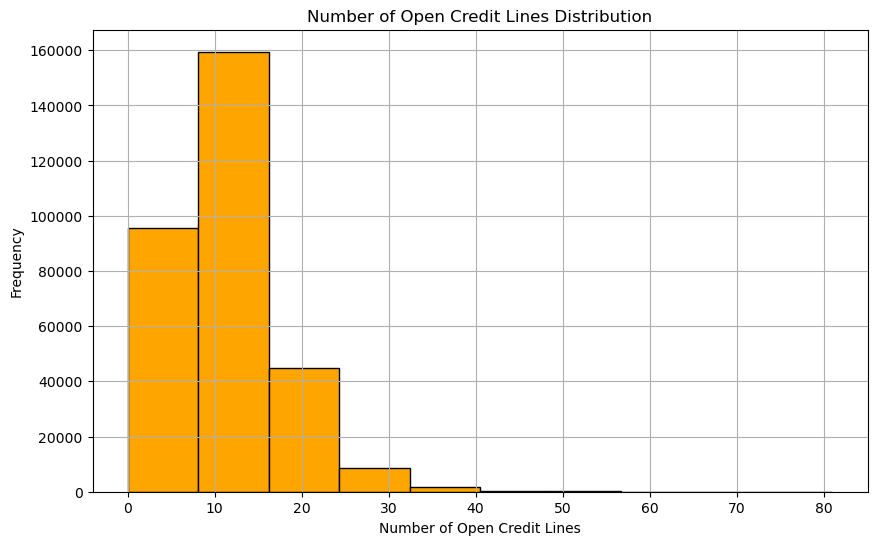

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['open_acc'], bins=10, color='orange', edgecolor='black')
plt.title('Number of Open Credit Lines Distribution')
plt.xlabel('Number of Open Credit Lines')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
train_validation_kaggle_independents['open_acc'].nunique()

71

The dataset includes counts of open accounts, representing the number of active credit accounts held by borrowers. Each entry reflects the quantity of accounts currently open for individual borrowers. Analyzing the distribution of open accounts provides insight into borrowers' credit utilization and financial commitments. This assessment helps lenders evaluate borrowers' creditworthiness and assess their ability to manage multiple credit obligations effectively.

#### Public Records

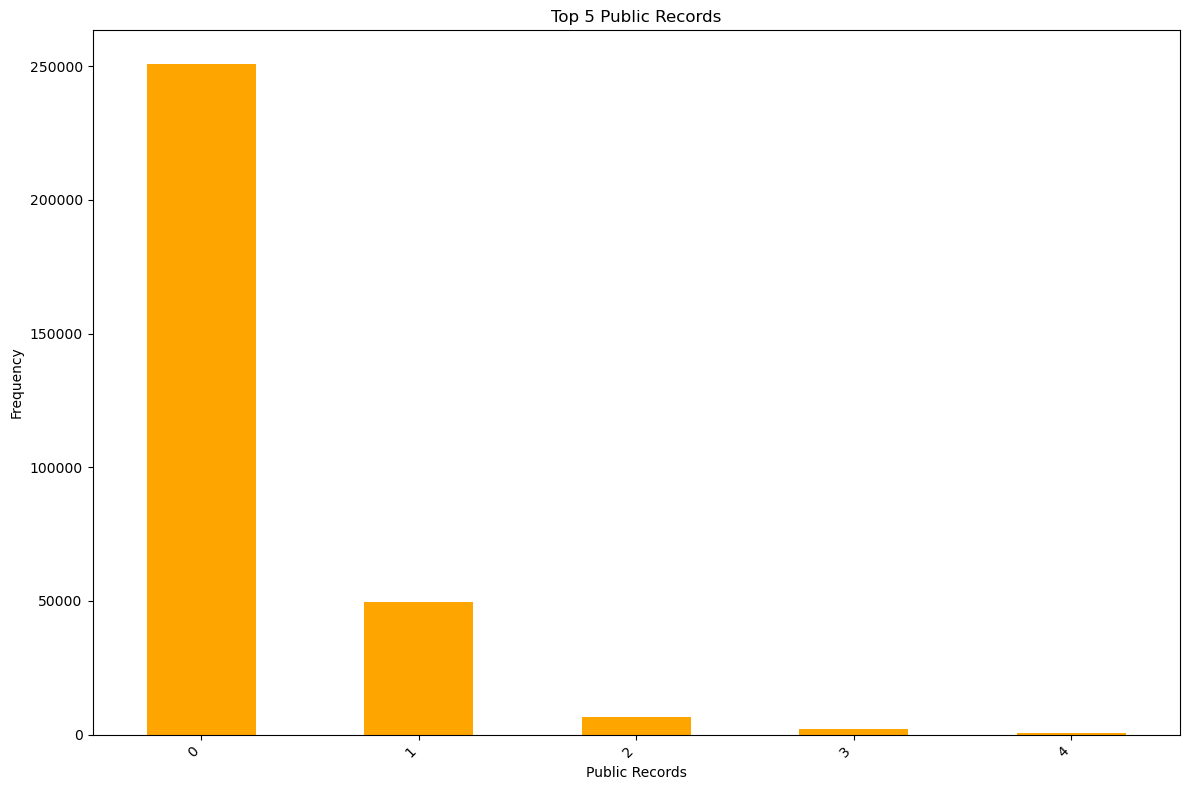

In [48]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['pub_rec'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title('Top 5 Public Records')
plt.xlabel('Public Records')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
train_validation_kaggle_independents['pub_rec'].nunique()

29

The dataset contains information on public records, indicating the presence of any legal or financial events recorded in borrowers' public records. Each entry reflects the existence of such records associated with individual borrowers. Analyzing the distribution of public records provides insight into borrowers' financial history and potential risk factors. This assessment helps lenders evaluate borrowers' creditworthiness and assess the impact of public records on lending decisions

#### Revolving Balance

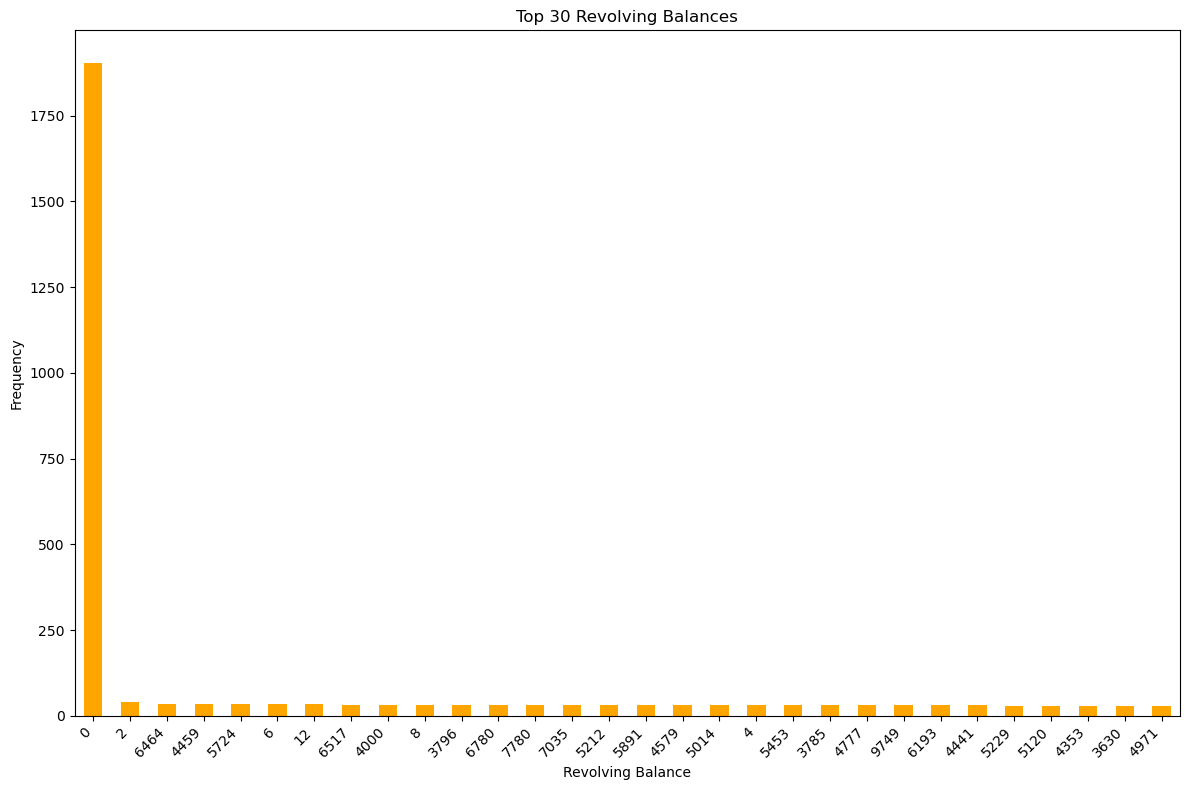

In [50]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['revol_bal'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Revolving Balances')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
train_validation_kaggle_independents['revol_bal'].nunique()

53882

The dataset includes revolving balances, representing the outstanding balances on borrowers' revolving credit accounts. Each entry reflects the amount of debt carried over from one billing cycle to the next on revolving credit lines. Analyzing the distribution of revolving balances provides insight into borrowers' credit utilization and debt management. This assessment helps lenders evaluate borrowers' financial health and assess their ability to manage revolving credit obligations effectively

#### Revolving Utilization Rate

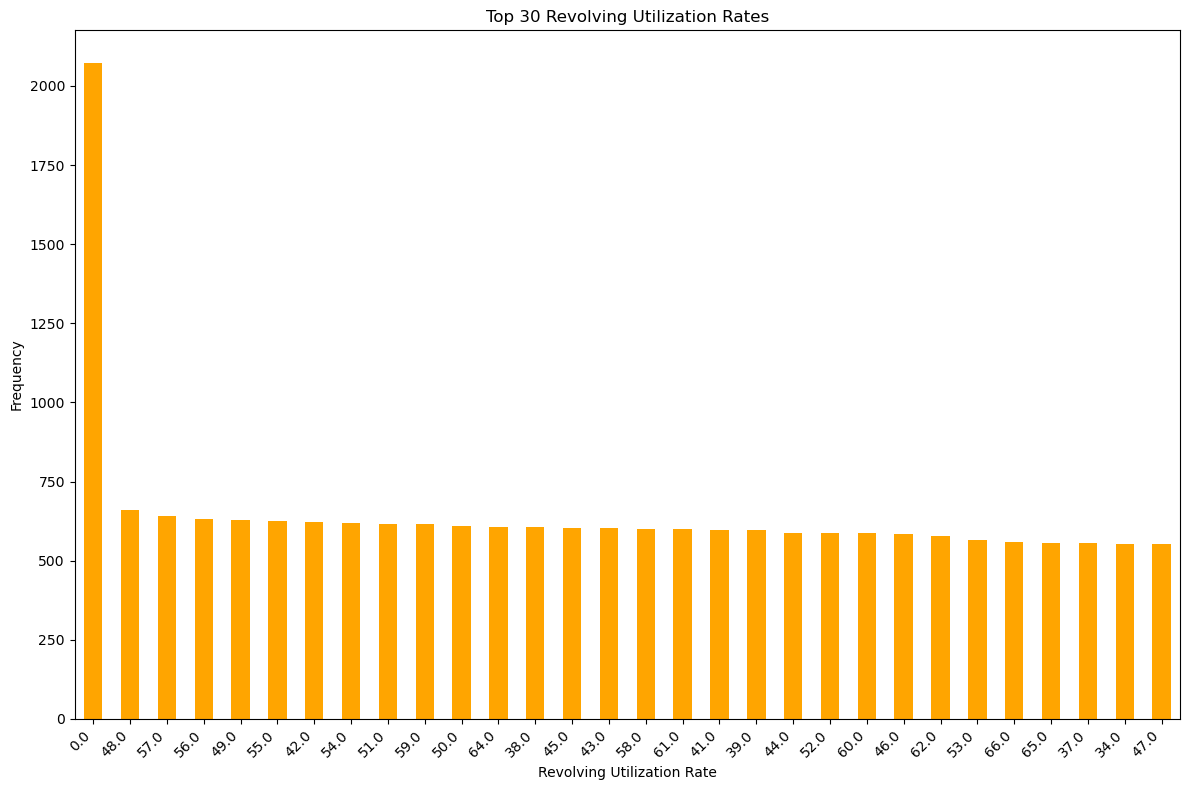

In [52]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['revol_util'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Revolving Utilization Rates')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
train_validation_kaggle_independents['revol_util'].nunique()

1160

The dataset contains revolving utilization rates, representing the percentage of available credit currently being utilized by borrowers on their revolving credit accounts. Each entry reflects the extent to which borrowers are utilizing their available credit lines. Analyzing the distribution of revolving utilization rates provides insight into borrowers' credit utilization behavior and debt management practices. This assessment helps lenders evaluate borrowers' credit risk and financial responsibility

#### Total Accounts

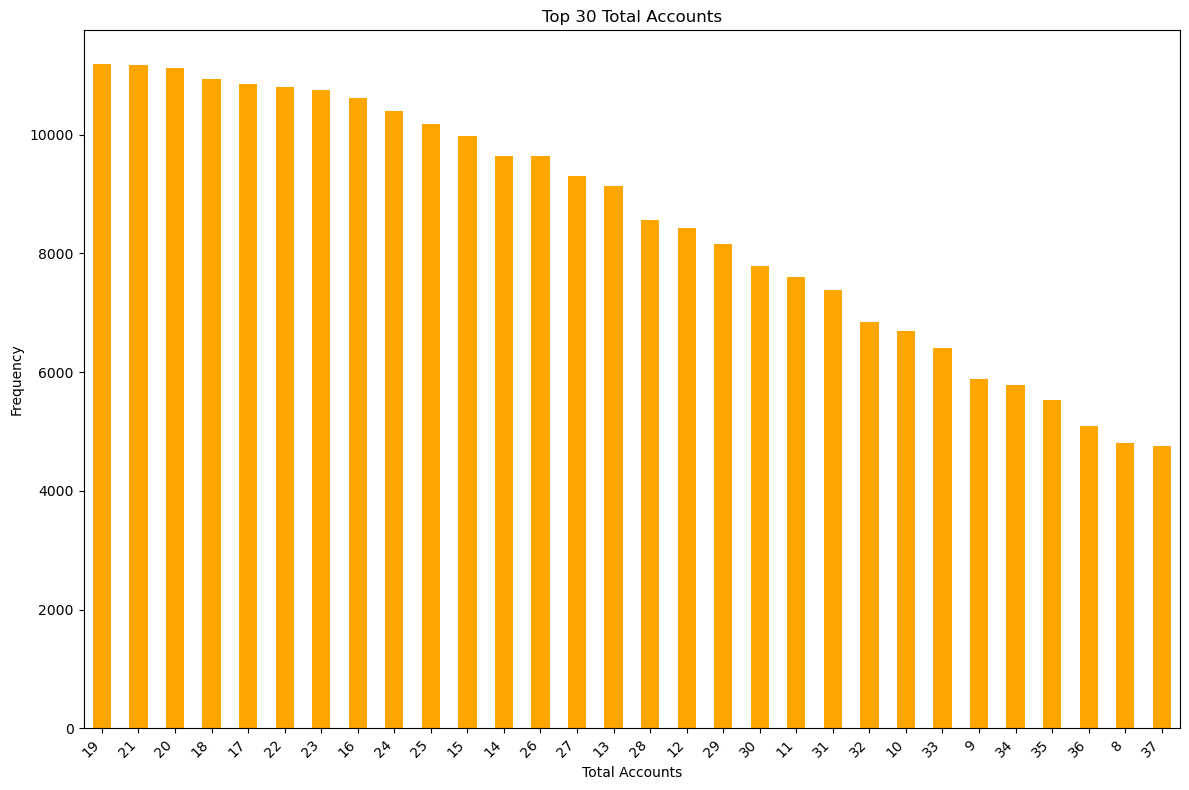

In [54]:
plt.figure(figsize=(12, 8))
train_validation_kaggle_independents['total_acc'].value_counts().head(30).plot(kind='bar', color='orange')
plt.title('Top 30 Total Accounts')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
train_validation_kaggle_independents['total_acc'].nunique()

127

The dataset includes counts of total accounts, representing the total number of credit accounts reported for individual borrowers. Each entry reflects the aggregate number of credit accounts, including both open and closed accounts. Analyzing the distribution of total accounts provides insight into borrowers' credit history and financial activity. This assessment helps lenders evaluate borrowers' creditworthiness and assess their credit management practices

#### Outstanding principal

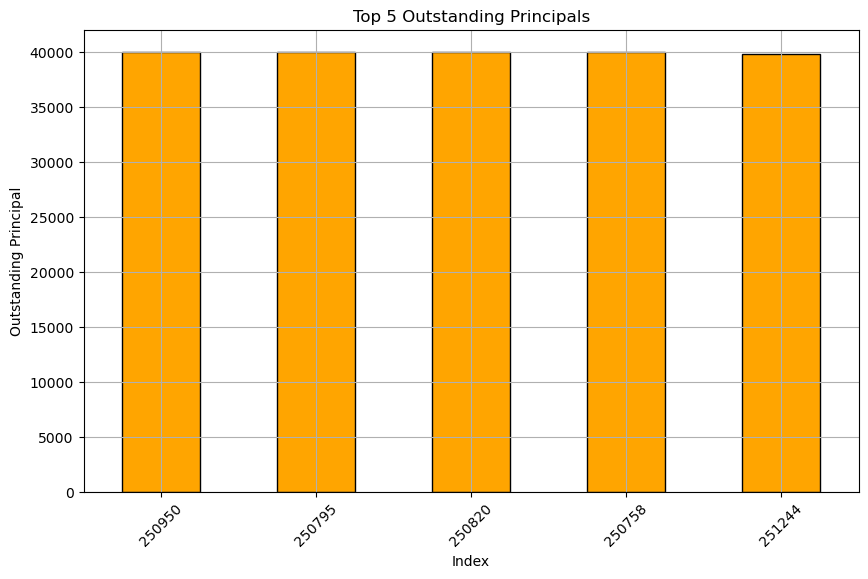

In [56]:
plt.figure(figsize=(10, 6))
train_validation_kaggle_independents['out_prncp'].sort_values(ascending=False).head(5).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 Outstanding Principals')
plt.xlabel('Index')
plt.ylabel('Outstanding Principal')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


In [57]:
train_validation_kaggle_independents['out_prncp'].nunique()

17906

The dataset contains outstanding principal amounts, representing the remaining balance on loans yet to be repaid by borrowers. Each entry reflects the amount of principal that borrowers still owe on their outstanding loans. Analyzing the distribution of outstanding principal amounts provides insight into borrowers' current debt obligations and repayment progress. This assessment helps lenders evaluate borrowers' financial health and assess their ability to manage existing debt

#### Total Payment

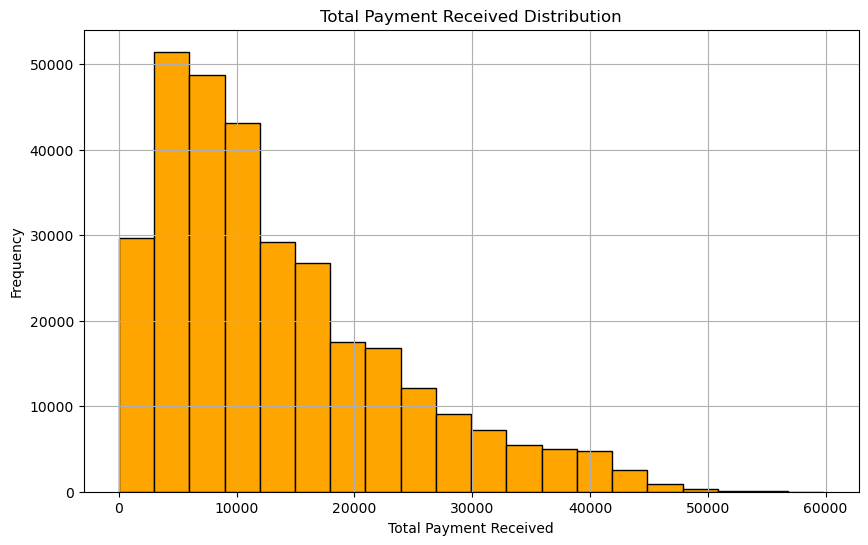

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['total_pymnt'], bins=20, color='orange', edgecolor='black')
plt.title('Total Payment Received Distribution')
plt.xlabel('Total Payment Received')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [59]:
train_validation_kaggle_independents['total_pymnt'].nunique()

299475

The dataset includes total payment amounts, representing the cumulative payments made by borrowers towards their loans. Each entry reflects the total amount of money borrowers have paid back to lenders. Analyzing the distribution of total payment amounts provides insight into borrowers' repayment behavior and loan servicing history. This assessment helps lenders evaluate borrowers' creditworthiness and assess their ability to meet their financial obligations

#### Loan Status

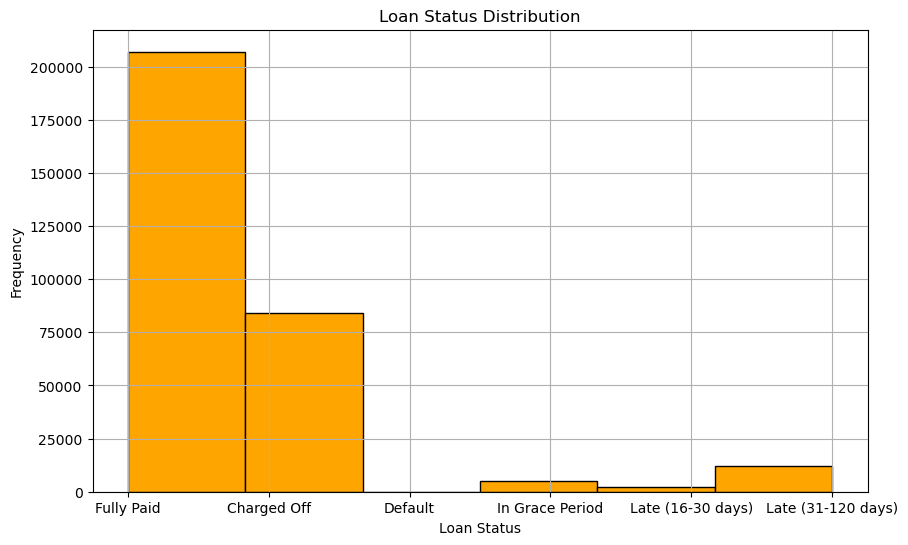

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(train_validation_kaggle_independents['loan_status'], bins=6, color='orange', edgecolor='black')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [61]:
train_validation_kaggle_independents['loan_status'].nunique()

6

The dataset contains loan status information, indicating the current status of individual loans. Each entry reflects the current state of repayment or disposition of the loan. Analyzing the distribution of loan statuses provides insight into the performance and outcomes of loans within the dataset. This assessment helps lenders evaluate the risk associated with different loan statuses and make informed decisions regarding loan management and risk mitigation strategies

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:100%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Analysis of the missing data</b></p>
</div>

In [62]:
missing_percentages = train_validation_kaggle_independents.isnull().mean().sort_values(ascending=False) * 100

# Print the percentages
print("Percentage of missing data in each column:")
print(missing_percentages)


Percentage of missing data in each column:
emp_title              9.515487
emp_length             7.278632
revol_util             0.068554
dti                    0.047634
inq_last_6mths         0.000322
loan_amnt              0.000000
total_pymnt            0.000000
out_prncp              0.000000
total_acc              0.000000
revol_bal              0.000000
pub_rec                0.000000
open_acc               0.000000
earliest_cr_line       0.000000
delinq_2yrs            0.000000
purpose                0.000000
addr_state             0.000000
funded_amnt            0.000000
issue_d                0.000000
verification_status    0.000000
annual_inc             0.000000
home_ownership         0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
loan_status            0.000000
dtype: float64


The missing data percentages for various columns in the dataset 'train_validation_kaggle_independents' present an interesting pattern. Notably, the columns 'emp_title' and 'emp_length' exhibit the highest rates of missing data, accounting for approximately 9.52% and 7.28%, respectively. This suggests potential challenges in obtaining complete employment-related information for the borrowers. However, the majority of other columns demonstrate minimal or no missing data, indicating robustness in data collection processes for variables such as 'loan_amount,' 'total_pymnt,' and 'out_prncp.' It's crucial to handle missing data appropriately, as it can impact the accuracy and reliability of analyses and model predictions. Techniques such as imputation or exclusion may be employed based on the specific characteristics and requirements of the dataset and analysis objectives. Understanding and addressing missing data effectively is essential for ensuring the integrity and validity of subsequent analyses and insights derived from the dataset.

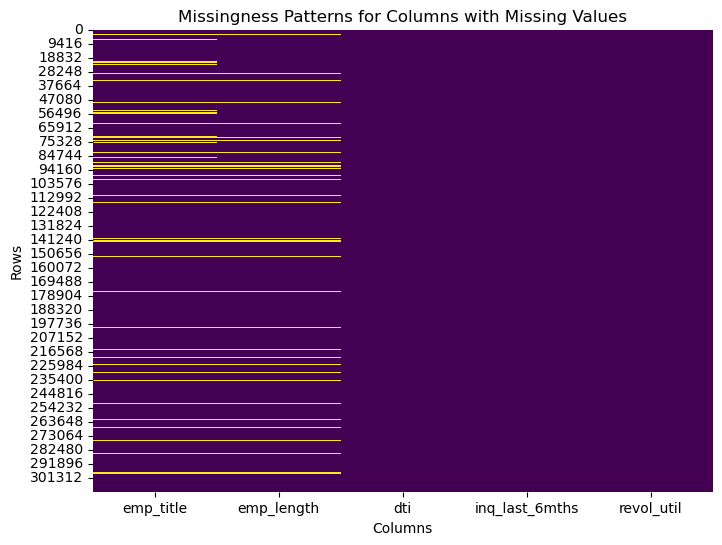

In [63]:
columns_with_missing_values = train_validation_kaggle_independents.columns[train_validation_kaggle_independents.isnull().any()]

plt.figure(figsize=(8, 6))
sns.heatmap(train_validation_kaggle_independents[columns_with_missing_values].isnull(), cmap='viridis', cbar=False)
plt.title('Missingness Patterns for Columns with Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

With this heatmap we can check that the missing follow a pattern namely when they are missing from emp_title they are also missing from emp_length

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:100%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Analysis of the different data categories</b></p>
</div>

In [64]:
numerical_columns = train_validation_kaggle_independents.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_columns = train_validation_kaggle_independents.select_dtypes(include=['object']).columns.tolist()

# Print the lists
print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt']

Categorical columns:
['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'earliest_cr_line', 'loan_status']


The dataset is divided into two distinct sets of variables: numerical and categorical. Numerical columns encompass quantitative data such as loan amount, interest rate, and borrower income, among others. These variables are characterized by numeric values and can often be subjected to mathematical operations or statistical analysis. On the other hand, categorical columns consist of qualitative data, including loan term, borrower grade, and employment status. These variables represent discrete categories or levels and are typically used for grouping or classification purposes. The segregation of variables into numerical and categorical categories allows for tailored analysis approaches and ensures appropriate data handling techniques are applied to each variable type.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:100%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Analysis of the potential data errors or anomalies</b></p>
</div>

In [65]:
numerical_columns = train_validation_kaggle_independents.select_dtypes(include=['number']).columns
for col in numerical_columns:
    negative_values = train_validation_kaggle_independents[col][train_validation_kaggle_independents[col] < 0]
    if not negative_values.empty:
        print(f"Potential negative values in '{col}': {negative_values.tolist()}")

Potential negative values in 'dti': [-1.0]


The identification of a potential negative value in the 'dti' (debt-to-income ratio) column suggests a data anomaly that warrants further investigation. Negative values in this context are likely erroneous, as the debt-to-income ratio should always be non-negative. Resolving such anomalies is crucial for ensuring data accuracy and reliability in subsequent analyses or modeling tasks.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Dependent Variable </b></p>
</div>

TEXT

In [66]:
%time

CPU times: total: 0 ns
Wall time: 0 ns


## <b>4 <span style='color:#e61227'>|</span> Data splitting </b>

Before proceeding with manipulating columns, we'll split the data into two datasets. The idea is to avoid data leakage as much as possible...

In [67]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(train_validation_kaggle_independents, test_size=0.2)
train_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status
229935,24000,24000,24000.0,36 months,5.32,722.76,A,General Manager,< 1 year,MORTGAGE,200000.0,Source Verified,Oct-15,other,FL,26.50,0,Sep-12,1.0,10,0,9234,42.2,12,0.00,1803.600000,Charged Off
29596,16500,16500,16500.0,60 months,15.02,392.71,C,Assistant District Attorney,10+ years,MORTGAGE,73300.0,Source Verified,Dec-18,debt_consolidation,NY,20.74,0,Apr-14,0.0,6,0,7081,23.5,6,0.00,4298.184100,Fully Paid
149904,10100,10100,10100.0,36 months,10.75,329.47,B,front desk,4 years,RENT,22000.0,Not Verified,Mar-16,debt_consolidation,NY,19.39,0,Dec-89,1.0,15,1,3740,55.0,35,0.00,5940.309635,Fully Paid
249047,10000,10000,10000.0,36 months,9.99,322.63,B,NaN,NaN,MORTGAGE,163000.0,Not Verified,Oct-15,major_purchase,CA,23.35,0,Feb-95,1.0,9,1,14159,68.7,15,10459.62,2646.320000,Late (16-30 days)
118839,28000,28000,28000.0,60 months,23.13,791.43,F,Director of Sales,3 years,MORTGAGE,218000.0,Source Verified,Mar-16,debt_consolidation,CO,14.16,0,Jun-00,1.0,19,0,191825,88.0,43,0.00,42213.123040,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,8000,8000.0,36 months,9.17,255.04,B,Ultrasound technician,7 years,MORTGAGE,64000.0,Verified,Oct-15,debt_consolidation,FL,9.26,0,Jan-15,1.0,10,0,16050,34.7,12,9692.20,766.720000,Late (16-30 days)
267149,18000,18000,18000.0,36 months,5.32,542.07,A,NaN,NaN,RENT,70000.0,Not Verified,Dec-15,debt_consolidation,FL,28.97,0,Oct-00,0.0,6,0,12254,66.2,22,0.00,9369.450000,Charged Off
111927,11000,11000,11000.0,36 months,6.97,339.50,A,SUPERVISOR,10+ years,MORTGAGE,60000.0,Source Verified,Mar-16,debt_consolidation,IL,17.82,0,Mar-00,0.0,17,0,24888,47.1,42,0.00,18224.623240,Fully Paid
131433,14000,14000,14000.0,36 months,11.47,461.47,B,Teacher,10+ years,MORTGAGE,85000.0,Source Verified,Mar-16,house,TX,11.65,0,Feb-07,3.0,8,1,4111,30.2,12,0.00,24044.660140,Fully Paid


## <b>5 <span style='color:#e61227'>|</span> Pre Processing</b>

### Feature Engineering

In this section we'll check for the following (not necessarily in this order):
* Duplicate check
* Columns Missing values
* Temporal variables
* Selective transformation of incorrectly scaled values
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.1 |</span></b> Duplicate values</b></p>
</div>

We can check for duplicate values using the the duplicated() function. Doing it, we will notice there are no duplicated rows on the whole dataset.

In [68]:
train_validation_kaggle_independents.duplicated().sum()

0

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.2 |</span></b> Missing values in columns </b></p>
</div>

In [69]:
(train_df.isna().sum()/train_df.shape[0] * 100).sort_values(ascending=False)

emp_title              9.560152
emp_length             7.308006
revol_util             0.067186
dti                    0.045864
inq_last_6mths         0.000402
loan_amnt              0.000000
total_pymnt            0.000000
out_prncp              0.000000
total_acc              0.000000
revol_bal              0.000000
pub_rec                0.000000
open_acc               0.000000
earliest_cr_line       0.000000
delinq_2yrs            0.000000
purpose                0.000000
addr_state             0.000000
funded_amnt            0.000000
issue_d                0.000000
verification_status    0.000000
annual_inc             0.000000
home_ownership         0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
loan_status            0.000000
dtype: float64

We can get a sense of how many missing values are in columns by looking at the output above. Notice how there's a maximum of around 9% missing values in emp_title. Remembering the discoveries in the EDA phase of this notebook, that feature has a lot of unique values and it's a text feature. While the employment title can be useful, it's not really useful to determine if someone will default on a loan because it's not 100% indicative of income. We'll therefore drop it.

In [70]:
train_df.drop(columns=['emp_title'], inplace=True)
validation_df.drop(columns=['emp_title'], inplace=True)

Another feature with some missing values is emp_length - the length of employment in current job. This feature can be useful, so we won't discard it just yet. A way to deal with this is thinking about it's nature and our position relative to this dataset.
In this notebook, we're predicting loan defaults, so we're on the side of the loan issuers. Therefore, if we don't have a certain datapoint, it's better to hedge the risk of uncertainty by assuming the worst case scenario.
Therefore, a strategy to deal with missing values here is assuming that the person has been employed for the lowest number of years possible.

In [71]:
set(train_df['emp_length'].unique().tolist() + validation_df['emp_length'].unique().tolist())

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

Looking at this table we can apply the following:
- "< 1 year" will be equal to 0 years
- "10+ years" will be equal to 10 years
- the rest will be number of years in string

In [72]:
train_df['emp_length'].fillna('0')

229935     < 1 year
29596     10+ years
149904      4 years
249047            0
118839      3 years
            ...    
248778      7 years
267149            0
111927    10+ years
131433    10+ years
258796      2 years
Name: emp_length, Length: 248563, dtype: object

In [73]:
import re

def transform_length(df):

    def map_years(year_str):
        if year_str == '< 1 year':
            return 0
        tokens = re.findall(r'\d+', year_str)
        if len(tokens) == 0:
            return 0
        return int(tokens[0])

    #fill NaN with 0 & apply map_years func
    df['emp_length'] = df['emp_length'] \
        .fillna('0') \
        .apply(map_years)

transform_length(train_df)
transform_length(validation_df)
train_df['emp_length']

229935     0
29596     10
149904     4
249047     0
118839     3
          ..
248778     7
267149     0
111927    10
131433    10
258796     2
Name: emp_length, Length: 248563, dtype: int64

We're now left with residual missing values. Since these represent less than 1% of the data, we can either drop them or fill with mode/median. For simplicity sake, we'll just drop them since they are very residual.

In [74]:
train_df.dropna(inplace=True)
validation_df.dropna(inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.3 |</span></b> Dealing with categorical features </b></p>
</div>

An important part of dealing with the various features of the model is converting them from categorical to numerical. Since we have few categorical features, we can go over them one by one...

In [75]:
train_df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'earliest_cr_line', 'loan_status'],
      dtype='object')

If we remember, the target variable "loan_status" will indicate how the loan ended up. Since we want to essentially predict if a client is going to default on the loan, it means we want to check that the client's loan status is neither "Fully Paid", nor "Current", nor "In Grace Period" - this last one means that while he's late on his payment, he's still within the acceptable day range to pay. Therefore, the variable will be 1 if loan_status is default else 0 if not default.

In [76]:
not_function = lambda b: not b

train_df.loan_status = train_df['loan_status'] \
    .isin(['Current', 'Fully Paid', 'In Grace Period']) \
    .apply(not_function) \
    .astype('int')

validation_df.loan_status = validation_df['loan_status'] \
    .isin(['Current', 'Fully Paid', 'In Grace Period']) \
    .apply(not_function) \
    .astype('int')
    
train_df.loan_status.value_counts()

loan_status
0    169710
1     78571
Name: count, dtype: int64

Proceeding with term, we notice there are only two possible scenarios: 60 months or 36 months loan term. To simplify this, we can transform this into a boolean variable "long_term" which would be 1 for 60 months and 0 for 36, signifying a long term loan.

In [77]:
train_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [78]:
#apply logic described
train_df['term'] = train_df.term.apply(lambda s: 1 if "60" in s else 0)
validation_df['term'] = validation_df.term.apply(lambda s: 1 if "60" in s else 0)
#rename columns
train_df.rename(columns={'term': 'long_term'}, inplace=True)
validation_df.rename(columns={'term': 'long_term'}, inplace=True)
#verify if ok
train_df.long_term.unique()

array([0, 1], dtype=int64)

Remembering the results from the Explanatory Data Analysis (EDA) phase, it can be seen that grade is a categorical feature that is a letter from A to G representing the quality of the loan (risk of default). Since it's an ordinal type of classification, we can just use a label encoder here. In order to be careful with data leakage, the encoder will be fitted & transformed with the training data, but the feature on validation will only be transformed according to the training data.

In [79]:
from sklearn.preprocessing import LabelEncoder

print("Before change: ", train_df.grade.unique())
grade_encoder = LabelEncoder()
train_df['grade'] = grade_encoder.fit_transform(train_df['grade'])
validation_df['grade'] = grade_encoder.transform(validation_df['grade'])
print("After change: ", train_df.grade.unique())

Before change:  ['A' 'C' 'B' 'F' 'D' 'E' 'G']
After change:  [0 2 1 5 3 4 6]


We now deal with the home ownership feature which can assume the values: 'MORTGAGE', 'RENT', 'OWN', or 'ANY'. For the "home_ownership" variable, since the categories do not have a clear ordinal relationship then, one-hot encoding would be preferable.

In [80]:
train_df = pd.get_dummies(train_df, columns=['home_ownership'], dtype=int)
validation_df = pd.get_dummies(validation_df, columns=['home_ownership'], dtype=int)
train_df

,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,24000,24000.0,0,5.32,722.76,0,0,200000.0,Source Verified,Oct-15,other,FL,26.50,0,Sep-12,1.0,10,0,9234,42.2,12,0.00,1803.600000,1,0,1,0,0
29596,16500,16500,16500.0,1,15.02,392.71,2,10,73300.0,Source Verified,Dec-18,debt_consolidation,NY,20.74,0,Apr-14,0.0,6,0,7081,23.5,6,0.00,4298.184100,0,0,1,0,0
149904,10100,10100,10100.0,0,10.75,329.47,1,4,22000.0,Not Verified,Mar-16,debt_consolidation,NY,19.39,0,Dec-89,1.0,15,1,3740,55.0,35,0.00,5940.309635,0,0,0,0,1
249047,10000,10000,10000.0,0,9.99,322.63,1,0,163000.0,Not Verified,Oct-15,major_purchase,CA,23.35,0,Feb-95,1.0,9,1,14159,68.7,15,10459.62,2646.320000,1,0,1,0,0
118839,28000,28000,28000.0,1,23.13,791.43,5,3,218000.0,Source Verified,Mar-16,debt_consolidation,CO,14.16,0,Jun-00,1.0,19,0,191825,88.0,43,0.00,42213.123040,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,8000,8000.0,0,9.17,255.04,1,7,64000.0,Verified,Oct-15,debt_consolidation,FL,9.26,0,Jan-15,1.0,10,0,16050,34.7,12,9692.20,766.720000,1,0,1,0,0
267149,18000,18000,18000.0,0,5.32,542.07,0,0,70000.0,Not Verified,Dec-15,debt_consolidation,FL,28.97,0,Oct-00,0.0,6,0,12254,66.2,22,0.00,9369.450000,1,0,0,0,1
111927,11000,11000,11000.0,0,6.97,339.50,0,10,60000.0,Source Verified,Mar-16,debt_consolidation,IL,17.82,0,Mar-00,0.0,17,0,24888,47.1,42,0.00,18224.623240,0,0,1,0,0
131433,14000,14000,14000.0,0,11.47,461.47,1,10,85000.0,Source Verified,Mar-16,house,TX,11.65,0,Feb-07,3.0,8,1,4111,30.2,12,0.00,24044.660140,0,0,1,0,0


Both verification status and purpose are non-ordinal categorical features. As such, we'll use Label Encoder on them.

In [81]:
print("Before change verification_status encoder: ", train_df.verification_status.unique())
verification_status_encoder = LabelEncoder()
train_df['verification_status'] = verification_status_encoder.fit_transform(train_df['verification_status'])
validation_df['verification_status'] = verification_status_encoder.transform(validation_df['verification_status'])
print("After change verification_status encoder: ", train_df.verification_status.unique())

print("Before change purpose encoder: ", train_df.purpose.unique())
purpose_encoder = LabelEncoder()
train_df['purpose'] = purpose_encoder.fit_transform(train_df['purpose'])
validation_df['purpose'] = purpose_encoder.transform(validation_df['purpose'])
print("After change purpose encoder: ", train_df.purpose.unique())

Before change verification_status encoder:  ['Source Verified' 'Not Verified' 'Verified']
After change verification_status encoder:  [1 0 2]
Before change purpose encoder:  ['other' 'debt_consolidation' 'major_purchase' 'home_improvement'
 'credit_card' 'moving' 'small_business' 'house' 'car' 'medical'
 'vacation' 'renewable_energy' 'wedding']
After change purpose encoder:  [ 8  2  5  3  1  7 10  4  0  6 11  9 12]


Before deciding how to deal with the U.S. state where the loan was issued, it's maybe preferable to check if it's even worth our time. If we see that nearly all states have the same rates of defaulting, then it's useless for predictive purposes... We'll investigate it by grouping by state...

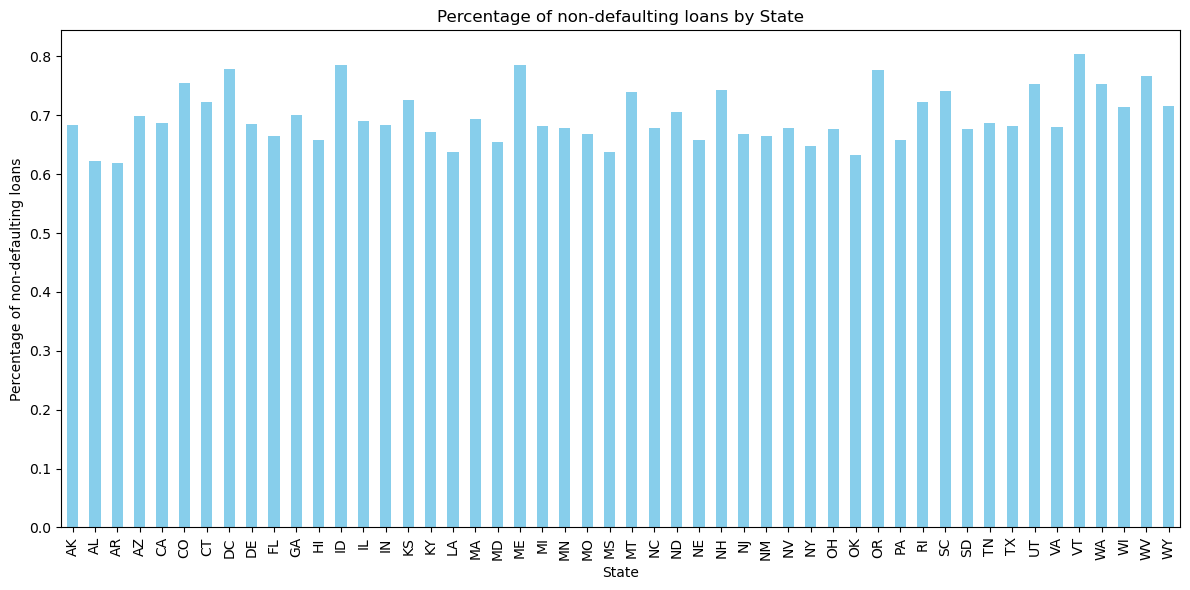

In [82]:
grouped_state_loan_status_data = 1-train_df.groupby(by="addr_state")['loan_status'].mean()

# Plotting
plt.figure(figsize=(12, 6))
grouped_state_loan_status_data.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage of non-defaulting loans')
plt.title('Percentage of non-defaulting loans by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Since it seems that the percentage of performing loans is almost uniform accross states, this feature is useless and thus should be removed.

We now move on to tackle the "earliest credit line" feature. The format of this feature is "Month-Year shortened" (e.g. "Apr-00" for 2000 April). To tackle this, we'll use only the year and convert it an integer. If less than 30, then surely it's after the 2000s and so we add 2000, else we add 1900. The idea here is that the years carry more meaning in this feature, since economic cycles typically span over years and affect personal finances.

In [83]:
train_df.earliest_cr_line

229935    Sep-12
29596     Apr-14
149904    Dec-89
249047    Feb-95
118839    Jun-00
           ...  
248778    Jan-15
267149    Oct-00
111927    Mar-00
131433    Feb-07
258796    Aug-01
Name: earliest_cr_line, Length: 248281, dtype: object

In [84]:
def transform_earlist_cr_line(df):
    df['earliest_cr_line'] = df.earliest_cr_line \
        .apply(lambda d: int(d.split("-")[1])) \
        .apply(lambda y: 2000 + y if y < 30 else 1900 + y)

transform_earlist_cr_line(train_df)
transform_earlist_cr_line(validation_df)

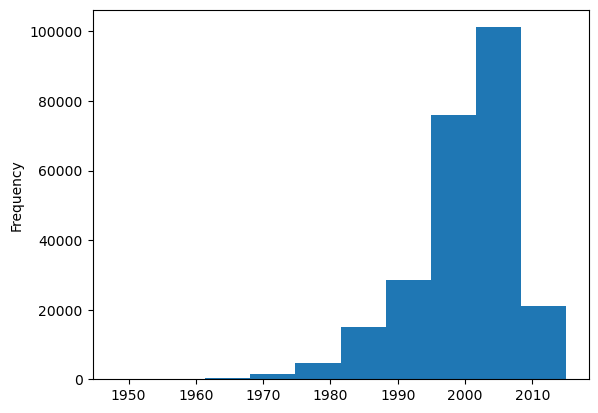

In [85]:
train_df.earliest_cr_line.plot(kind='hist', bins=10)
plt.show()

As seen in the plot above, the earliest credit lines for loan borrowers was - for the majority of them - in the 2000s. Some had credit lines going to the 1970's, but the majority is relatively young.

----------------------------------------
Having dealt with categorical variables, we can see how many remain:

In [86]:
train_df.select_dtypes(include=['object']).columns

Index(['issue_d', 'addr_state'], dtype='object')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.4 |</span></b> Dropping redundant columns </b></p>
</div>

We'll start by dropping the columns we've previously deemed not worthy for our model. One of them is them is the issue_date since it doesn't particularly help us. This could lead to data leakage since we wouldn't have access to this feature.

In [87]:
useless_columns = ['addr_state', 'issue_d']
train_df.drop(columns=useless_columns, inplace=True)
validation_df.drop(columns=useless_columns, inplace=True)

In [88]:
train_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,grade,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,24000,24000.0,0,5.32,722.76,0,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,0.00,1803.600000,1,0,1,0,0
29596,16500,16500,16500.0,1,15.02,392.71,2,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0.00,4298.184100,0,0,1,0,0
149904,10100,10100,10100.0,0,10.75,329.47,1,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0.00,5940.309635,0,0,0,0,1
249047,10000,10000,10000.0,0,9.99,322.63,1,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,10459.62,2646.320000,1,0,1,0,0
118839,28000,28000,28000.0,1,23.13,791.43,5,3,218000.0,1,2,14.16,0,2000,1.0,19,0,191825,88.0,43,0.00,42213.123040,0,0,1,0,0


Looking at the table above, there can be a suspicion if 'loan_amnt' is the same as 'funded_amnt'. To check it, we can see the correlation between them...

In [89]:
train_df.loan_amnt.corr(train_df.funded_amnt)

0.9999999999999998

As we suspected, they have a perfect correlation. This means they are virtually the same and so we can drop one of them. We'll drop 'funded_amnt'.

In [90]:
train_df.drop(columns=['funded_amnt'], inplace=True)
validation_df.drop(columns=['funded_amnt'], inplace=True)

We can also therefore be suspicious that 'funded_amnt_inv' is also the same as 'loan_amnt'. Following the same methodology we can see that it's almost the same, and therefore we should drop it to avoid multi-colinearity in the future.

In [91]:
train_df.loan_amnt.corr(train_df.funded_amnt_inv)

0.9999927351086145

In [92]:
train_df.drop(columns=['funded_amnt_inv'], inplace=True)
validation_df.drop(columns=['funded_amnt_inv'], inplace=True)

In [93]:
train_df

,loan_amnt,long_term,int_rate,installment,grade,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,722.76,0,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,0.00,1803.600000,1,0,1,0,0
29596,16500,1,15.02,392.71,2,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0.00,4298.184100,0,0,1,0,0
149904,10100,0,10.75,329.47,1,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0.00,5940.309635,0,0,0,0,1
249047,10000,0,9.99,322.63,1,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,10459.62,2646.320000,1,0,1,0,0
118839,28000,1,23.13,791.43,5,3,218000.0,1,2,14.16,0,2000,1.0,19,0,191825,88.0,43,0.00,42213.123040,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,0,9.17,255.04,1,7,64000.0,2,2,9.26,0,2015,1.0,10,0,16050,34.7,12,9692.20,766.720000,1,0,1,0,0
267149,18000,0,5.32,542.07,0,0,70000.0,0,2,28.97,0,2000,0.0,6,0,12254,66.2,22,0.00,9369.450000,1,0,0,0,1
111927,11000,0,6.97,339.50,0,10,60000.0,1,2,17.82,0,2000,0.0,17,0,24888,47.1,42,0.00,18224.623240,0,0,1,0,0
131433,14000,0,11.47,461.47,1,10,85000.0,1,4,11.65,0,2007,3.0,8,1,4111,30.2,12,0.00,24044.660140,0,0,1,0,0


If we look at the columns, we have interest rate and grade. This is unnecessary because lending institutions will loan at higher yields/rates if the credit score is riskier because the goal is try to extract as much money from the original principal as possible. We can plot both against eachother to prove this:

<Axes: xlabel='int_rate', ylabel='grade'>

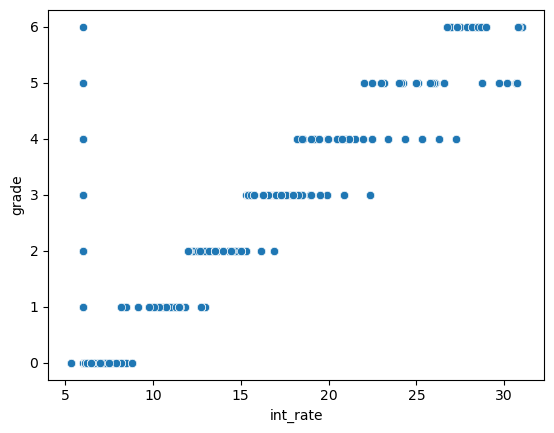

In [94]:
sns.scatterplot(data = train_df, x = "int_rate", y = "grade")

Observing the plot, we can clearly see that there is an upward trend, as the grade increases (meaning gets worse because A=0, B=1, C=2, etc.) the interest rates also go up. Therefore, we can eliminate one of them.

In [95]:
train_df.drop(columns=['grade'], inplace=True)
validation_df.drop(columns=['grade'], inplace=True)

In [96]:
train_df.head(5)

,loan_amnt,long_term,int_rate,installment,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,722.76,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,0.00,1803.600000,1,0,1,0,0
29596,16500,1,15.02,392.71,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0.00,4298.184100,0,0,1,0,0
149904,10100,0,10.75,329.47,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0.00,5940.309635,0,0,0,0,1
249047,10000,0,9.99,322.63,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,10459.62,2646.320000,1,0,1,0,0
118839,28000,1,23.13,791.43,3,218000.0,1,2,14.16,0,2000,1.0,19,0,191825,88.0,43,0.00,42213.123040,0,0,1,0,0


Another dependent variable that can be eliminated is installments because they're a byproduct of loan amount, term and interest rates.

In [97]:
#loan_amnt * (1 + int_rate/100)/term (36 if 0 else 1)

manual_installments = (train_df['loan_amnt'] * (1 + train_df['int_rate']/100))
manual_installments = manual_installments/train_df['long_term'].apply(lambda v: 36 if v == 0 else 60)
print(manual_installments)
manual_installments.corr(train_df['installment'])

229935    702.133333
29596     316.305000
149904    310.715278
249047    305.527778
118839    574.606667
             ...    
248778    242.600000
267149    526.600000
111927    326.852778
131433    433.494444
258796    901.500000
Length: 248281, dtype: float64


0.9867658877595437

As we can see our manual calculations are very very near the actual installments - the correlation is near perfect. That means it's a dependant variable and therefore should be eliminated.

In [98]:
train_df.drop(columns=['installment'], inplace=True)
validation_df.drop(columns=['installment'], inplace=True)

In [99]:
train_df

,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,0.00,1803.600000,1,0,1,0,0
29596,16500,1,15.02,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0.00,4298.184100,0,0,1,0,0
149904,10100,0,10.75,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0.00,5940.309635,0,0,0,0,1
249047,10000,0,9.99,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,10459.62,2646.320000,1,0,1,0,0
118839,28000,1,23.13,3,218000.0,1,2,14.16,0,2000,1.0,19,0,191825,88.0,43,0.00,42213.123040,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,0,9.17,7,64000.0,2,2,9.26,0,2015,1.0,10,0,16050,34.7,12,9692.20,766.720000,1,0,1,0,0
267149,18000,0,5.32,0,70000.0,0,2,28.97,0,2000,0.0,6,0,12254,66.2,22,0.00,9369.450000,1,0,0,0,1
111927,11000,0,6.97,10,60000.0,1,2,17.82,0,2000,0.0,17,0,24888,47.1,42,0.00,18224.623240,0,0,1,0,0
131433,14000,0,11.47,10,85000.0,1,4,11.65,0,2007,3.0,8,1,4111,30.2,12,0.00,24044.660140,0,0,1,0,0


Now we will use weight of evidence (woe) and the information value (iv) of the variables to see if there are any variables that are worth dropping.

In [100]:
def calculate_woe_iv(df, feature, target):
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target], normalize='columns')
    
    # Handling division by zero and calculating WoE and IV
    contingency_table['woe'] = np.log((contingency_table[1] + 1e-10) / (contingency_table[0] + 1e-10))
    contingency_table['iv'] = (contingency_table[1] - contingency_table[0]) * contingency_table['woe']
    
    # Reorganize the DataFrame to match the format of the original table
    contingency_table.reset_index(inplace=True)
    contingency_table.rename(columns={0: '0', 1: '1'}, inplace=True)
    contingency_table.set_index(feature, inplace=True)
    contingency_table.index.name = feature
    contingency_table = contingency_table[['0', '1', 'woe', 'iv']]
    
    return contingency_table

def show_woe_iv(df, feature, target):
    print(f"Showing WoE and IV for feature {feature} against target {target}")
    df_woe_iv = calculate_woe_iv(df, feature, target)
    print(df_woe_iv)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot WoE
    ax1.bar(df_woe_iv.index, df_woe_iv['woe'])
    ax1.set_xlabel(feature)
    ax1.set_ylabel('WoE')
    ax1.set_title(f'WoE for {feature} against {target}')
    ax1.grid(True)
    
    # Plot IV
    ax2.bar(df_woe_iv.index, df_woe_iv['iv'], color='orange')  # Use different color for IV
    ax2.set_xlabel(feature)
    ax2.set_ylabel('IV')
    ax2.set_title(f'IV for {feature} against {target}')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    print(f"feature {feature} iv:", df_woe_iv["iv"].sum())
    return df_woe_iv

Showing WoE and IV for feature verification_status against target loan_status
loan_status                 0         1       woe        iv
verification_status                                        
0                    0.389853  0.246389 -0.458860  0.065830
1                    0.390295  0.432679  0.103092  0.004369
2                    0.219852  0.320933  0.378279  0.038237


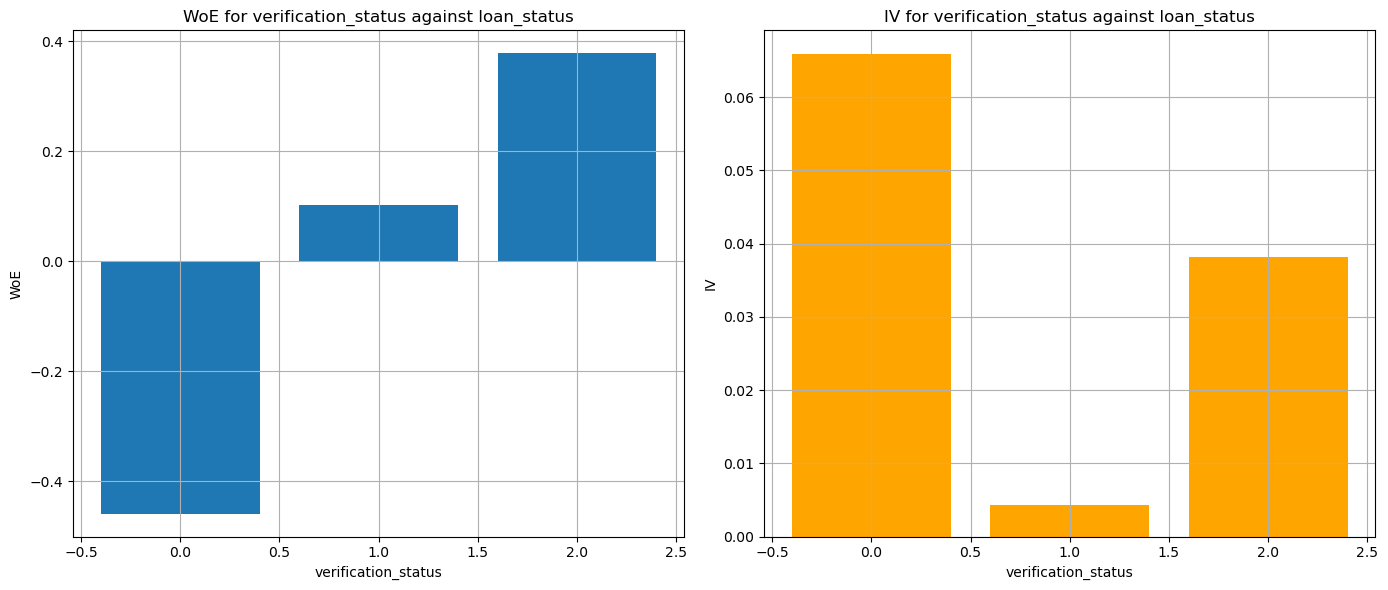

feature verification_status iv: 0.10843653133178008


loan_status,0,1,woe,iv
verification_status,,,,
0,0.389853,0.246389,-0.458860,0.065830
1,0.390295,0.432679,0.103092,0.004369
2,0.219852,0.320933,0.378279,0.038237


In [101]:
show_woe_iv(train_df, 'verification_status', 'loan_status')

Showing WoE and IV for feature purpose against target loan_status
loan_status         0         1        woe        iv
purpose                                             
0            0.012551  0.008082  -0.440164  0.001967
1            0.214672  0.189192  -0.126350  0.003219
2            0.556214  0.605109   0.084256  0.004120
3            0.076778  0.060608  -0.236498  0.003824
4            0.007354  0.006351  -0.146603  0.000147
5            0.025832  0.021624  -0.177833  0.000748
6            0.012745  0.013796   0.079250  0.000083
7            0.007678  0.008133   0.057568  0.000026
8            0.068228  0.064375  -0.058134  0.000224
9            0.000648  0.000853   0.274301  0.000056
10           0.009581  0.014853   0.438402  0.002311
11           0.007713  0.007025  -0.093382  0.000064
12           0.000006  0.000000 -10.984022  0.000065


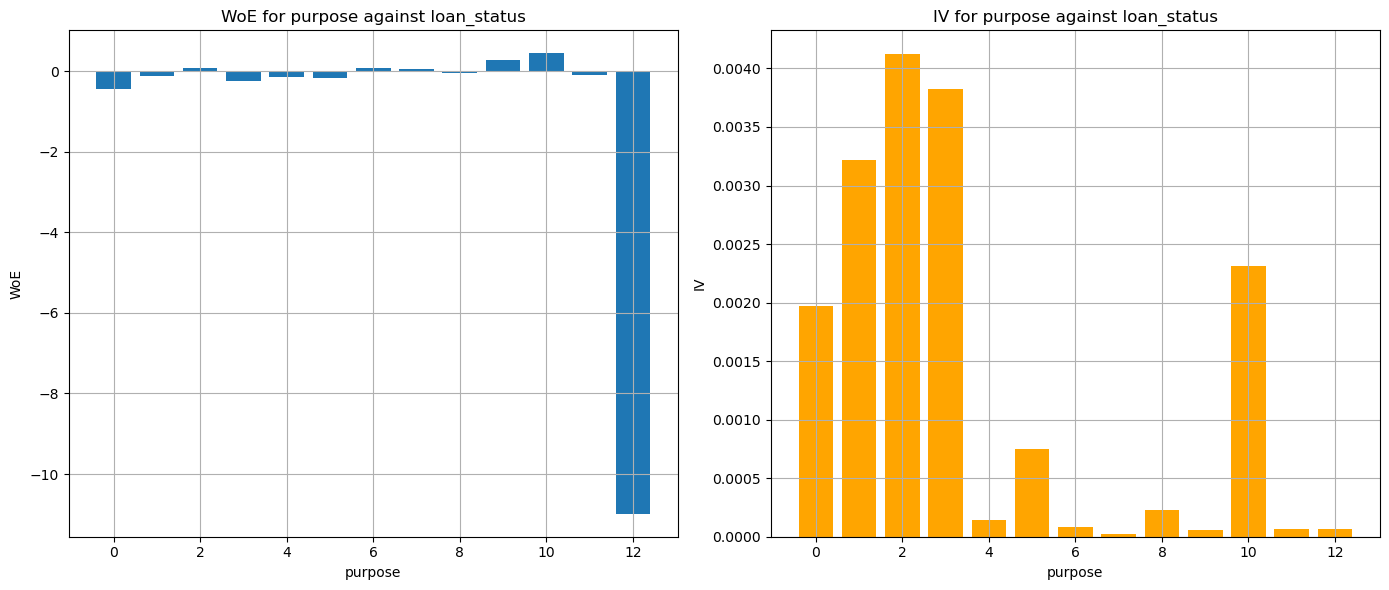

feature purpose iv: 0.016855600080030814


loan_status,0,1,woe,iv
purpose,,,,
0,0.012551,0.008082,-0.440164,0.001967
1,0.214672,0.189192,-0.126350,0.003219
2,0.556214,0.605109,0.084256,0.004120
3,0.076778,0.060608,-0.236498,0.003824
4,0.007354,0.006351,-0.146603,0.000147
5,0.025832,0.021624,-0.177833,0.000748
6,0.012745,0.013796,0.079250,0.000083
7,0.007678,0.008133,0.057568,0.000026
8,0.068228,0.064375,-0.058134,0.000224


In [102]:
show_woe_iv(train_df, 'purpose', 'loan_status')

Showing WoE and IV for feature long_term against target loan_status
loan_status         0         1       woe        iv
long_term                                          
0            0.703948  0.677706 -0.037992  0.000997
1            0.296052  0.322294  0.084930  0.002229


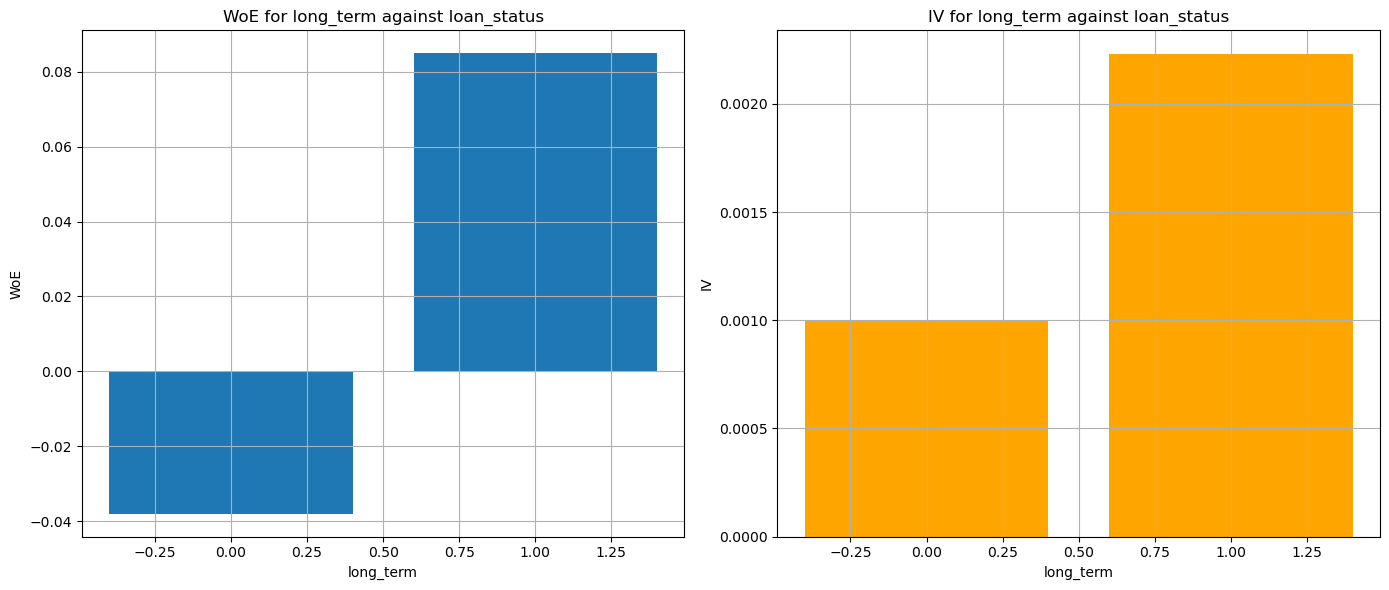

feature long_term iv: 0.0032257620040764645


loan_status,0,1,woe,iv
long_term,,,,
0,0.703948,0.677706,-0.037992,0.000997
1,0.296052,0.322294,0.084930,0.002229


In [103]:
show_woe_iv(train_df, 'long_term', 'loan_status')

Here we can see the woe and iv of verification_status which tells us that the variable is worth keeping

Showing WoE and IV for feature emp_length against target loan_status
loan_status         0         1       woe        iv
emp_length                                         
0            0.174951  0.147701 -0.169320  0.004614
1            0.068888  0.064629 -0.063813  0.000272
2            0.086347  0.086928  0.006700  0.000004
3            0.078675  0.080615  0.024354  0.000047
4            0.058730  0.057095 -0.028230  0.000046
5            0.060433  0.059259 -0.019618  0.000023
6            0.041247  0.038653 -0.064952  0.000168
7            0.033616  0.037520  0.109872  0.000429
8            0.040328  0.050731  0.229504  0.002388
9            0.030717  0.039327  0.247104  0.002128
10           0.326068  0.337542  0.034584  0.000397


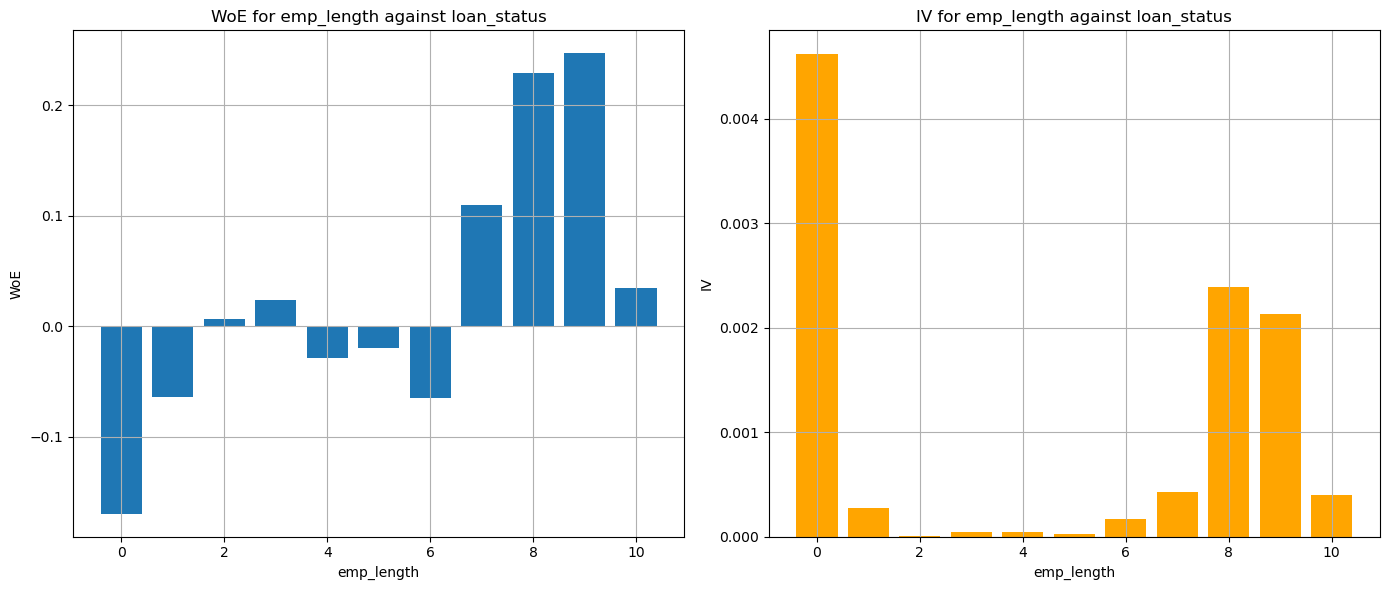

feature emp_length iv: 0.010515673072922518


loan_status,0,1,woe,iv
emp_length,,,,
0,0.174951,0.147701,-0.169320,0.004614
1,0.068888,0.064629,-0.063813,0.000272
2,0.086347,0.086928,0.006700,0.000004
3,0.078675,0.080615,0.024354,0.000047
4,0.058730,0.057095,-0.028230,0.000046
5,0.060433,0.059259,-0.019618,0.000023
6,0.041247,0.038653,-0.064952,0.000168
7,0.033616,0.037520,0.109872,0.000429
8,0.040328,0.050731,0.229504,0.002388


In [104]:
show_woe_iv(train_df, 'emp_length', 'loan_status')

Showing WoE and IV for feature inq_last_6mths against target loan_status
loan_status            0         1       woe        iv
inq_last_6mths                                        
0.0             0.615202  0.536865 -0.136205  0.010670
1.0             0.263502  0.289572  0.094343  0.002460
2.0             0.084562  0.112128  0.282156  0.007778
3.0             0.027753  0.043833  0.457034  0.007349
4.0             0.006641  0.013135  0.682028  0.004429
5.0             0.002339  0.004467  0.646938  0.001377


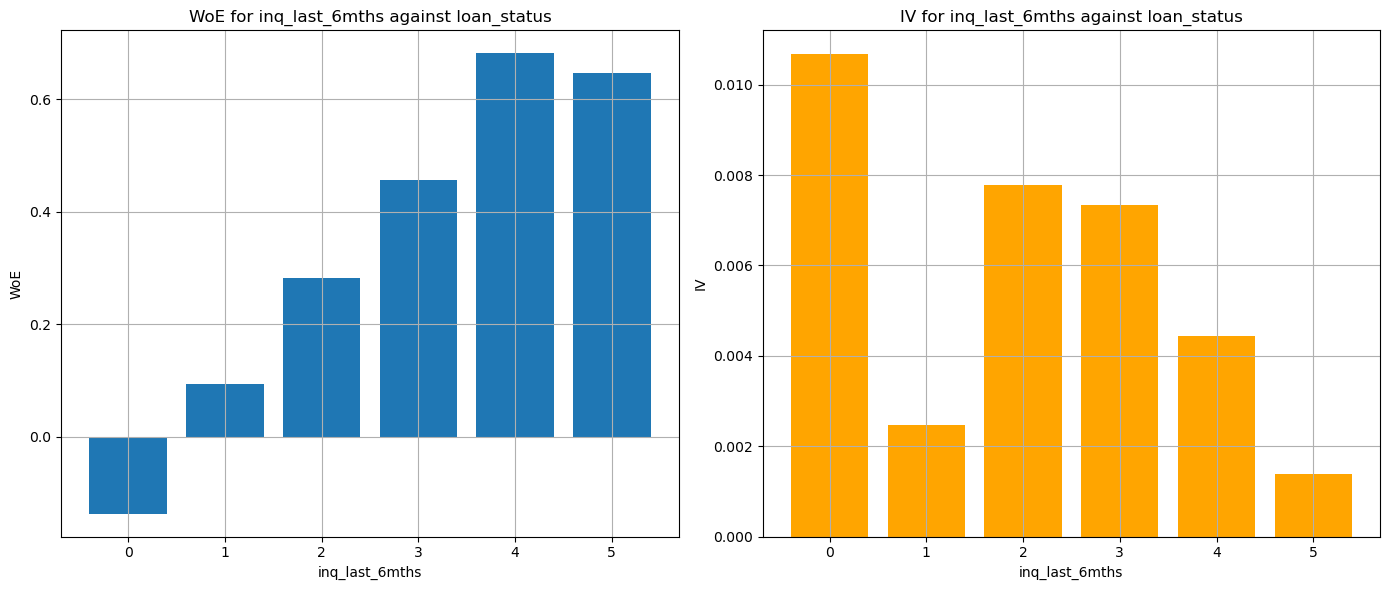

feature inq_last_6mths iv: 0.03406211924735061


loan_status,0,1,woe,iv
inq_last_6mths,,,,
0.0,0.615202,0.536865,-0.136205,0.010670
1.0,0.263502,0.289572,0.094343,0.002460
2.0,0.084562,0.112128,0.282156,0.007778
3.0,0.027753,0.043833,0.457034,0.007349
4.0,0.006641,0.013135,0.682028,0.004429
5.0,0.002339,0.004467,0.646938,0.001377


In [105]:
show_woe_iv(train_df, 'inq_last_6mths', 'loan_status')

After using the woe and iv, we investigated the importance of the analysed variables, concluding that we wont be dropping any of them based on this criteria as they have a good explanatory level.

Assuming that this model is predicting if someone will default on their loan, the total payment variable might introduce some data leakage, because it's a future variable. A priori, we have no knowledge of how much someone being granted a loan will payout. Therefore, we will drop "total_pyment".

In [106]:
train_df.drop(columns=['total_pymnt'], inplace=True)
validation_df.drop(columns=['total_pymnt'], inplace=True)

Going by the previous assumption, we also cannot determine how much outstanding principle someone will have on his loan at the loan issuance. So we also discard "out_prncp".

In [107]:
train_df.drop(columns=['out_prncp'], inplace=True)
validation_df.drop(columns=['out_prncp'], inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.5 |</span></b> Outliers check and removal </b></p>
</div>

In this part we are going to check our dataframe for outliers and remove them as these would only make our model more inaccurate

In [108]:
train_df

,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,1,0,1,0,0
29596,16500,1,15.02,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0,0,1,0,0
149904,10100,0,10.75,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0,0,0,0,1
249047,10000,0,9.99,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,1,0,1,0,0
118839,28000,1,23.13,3,218000.0,1,2,14.16,0,2000,1.0,19,0,191825,88.0,43,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,0,9.17,7,64000.0,2,2,9.26,0,2015,1.0,10,0,16050,34.7,12,1,0,1,0,0
267149,18000,0,5.32,0,70000.0,0,2,28.97,0,2000,0.0,6,0,12254,66.2,22,1,0,0,0,1
111927,11000,0,6.97,10,60000.0,1,2,17.82,0,2000,0.0,17,0,24888,47.1,42,0,0,1,0,0
131433,14000,0,11.47,10,85000.0,1,4,11.65,0,2007,3.0,8,1,4111,30.2,12,0,0,1,0,0


We are only checking our continuous variables for possible outliers

In [109]:
continuous_variables = ["int_rate","dti","revol_bal","revol_util"]
train_df[continuous_variables].head(5)

,int_rate,dti,revol_bal,revol_util
229935,5.32,26.50,9234,42.2
29596,15.02,20.74,7081,23.5
149904,10.75,19.39,3740,55.0
249047,9.99,23.35,14159,68.7
118839,23.13,14.16,191825,88.0


In [110]:
def identify_outliers(df, col):
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[ (df[col] < lower) | (df[col] > upper) ]

outlier_indices = set()
for var in continuous_variables:
    outliers = identify_outliers(train_df, var)
    n_outliers = outliers.shape[0]
    print(f"Feature {var} has {n_outliers} outliers")
    outlier_indices = outlier_indices | set(outliers.index)

print(f"\nTotal of {len(outlier_indices)} outliers or {round(len(outlier_indices)/train_df.shape[0] * 100, 2)}% of data")

Feature int_rate has 3813 outliers
Feature dti has 1705 outliers
Feature revol_bal has 16199 outliers
Feature revol_util has 16 outliers

Total of 21293 outliers or 8.58% of data


Here we can see that a small, but considerable, percentage of our data are outliers, this data should still be analysed but it should have their own model dedicated to these more extreme cases, we wont be developing this model in this assignment, but for a more in depth analysis of this dataset this would be necessary.

In [111]:
train_df.drop(outlier_indices, inplace=True)
train_df

,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,12,1,0,1,0,0
29596,16500,1,15.02,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,6,0,0,1,0,0
149904,10100,0,10.75,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,35,0,0,0,0,1
249047,10000,0,9.99,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,15,1,0,1,0,0
94943,39600,0,5.32,1,108000.0,1,3,17.73,0,2003,0.0,18,0,22535,66.3,28,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248778,8000,0,9.17,7,64000.0,2,2,9.26,0,2015,1.0,10,0,16050,34.7,12,1,0,1,0,0
267149,18000,0,5.32,0,70000.0,0,2,28.97,0,2000,0.0,6,0,12254,66.2,22,1,0,0,0,1
111927,11000,0,6.97,10,60000.0,1,2,17.82,0,2000,0.0,17,0,24888,47.1,42,0,0,1,0,0
131433,14000,0,11.47,10,85000.0,1,4,11.65,0,2007,3.0,8,1,4111,30.2,12,0,0,1,0,0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.6 |</span></b> Multicollinearity check and removal </b></p>
</div>

Now we have several remaining variables, we should check the multicollinearity of variables. We have elected to remove outliers first because they will influence multicollinearity and standardization. In this step we basically ensure that all variables in the model are as independent as possible, as to not bias it.

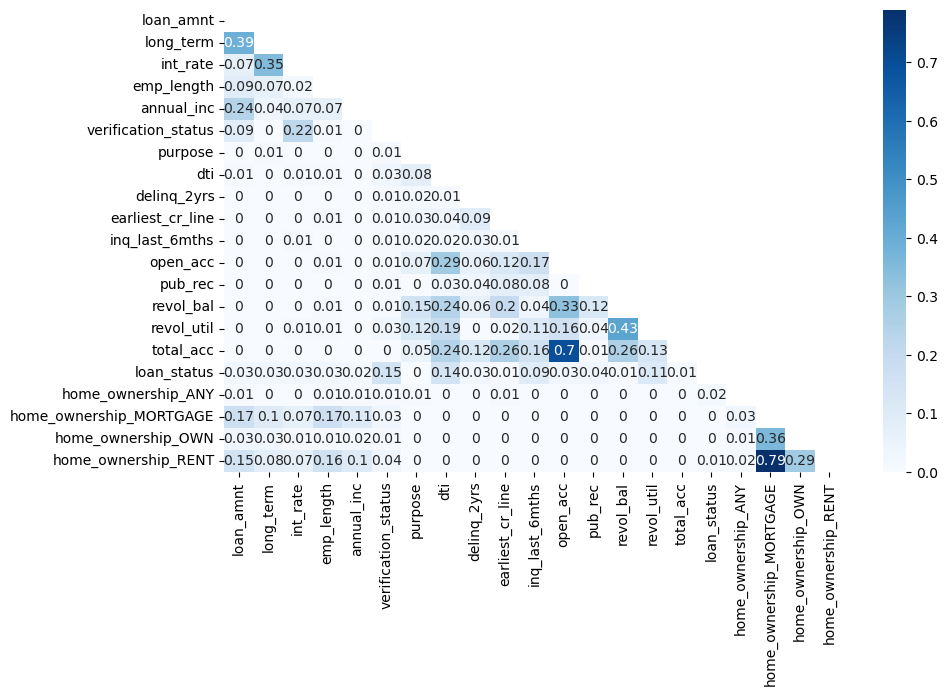

In [112]:
def show_corr(df):
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 6))
    sns.heatmap(abs(np.round(corr_matrix, 2)), cmap="Blues", annot=True, mask=mask)

show_corr(train_df)

Looking above at the heatmap of absolute correlation, we notice that we have only two obviously correlated pairs of features: "open_acc" against "total_acc"; and "home_ownership_MORTGAGE" against "home_ownership_RENT". 

In the first pair, we will drop "total_acc" against "open_acc" because "total_acc" refers to how many are currently on credit file, but not how many are open/being used.

In [113]:
train_df.drop(columns=['total_acc'], inplace=True)
validation_df.drop(columns=['total_acc'], inplace=True)

To determine which we're going to drop of home_ownership, we will use the IV/WOE metrics. The one with bigger IV against the predicting case, will remain.

Showing WoE and IV for feature home_ownership_RENT against target loan_status
loan_status                 0         1       woe        iv
home_ownership_RENT                                        
0                    0.614881  0.609314 -0.009096  0.000051
1                    0.385119  0.390686  0.014353  0.000080


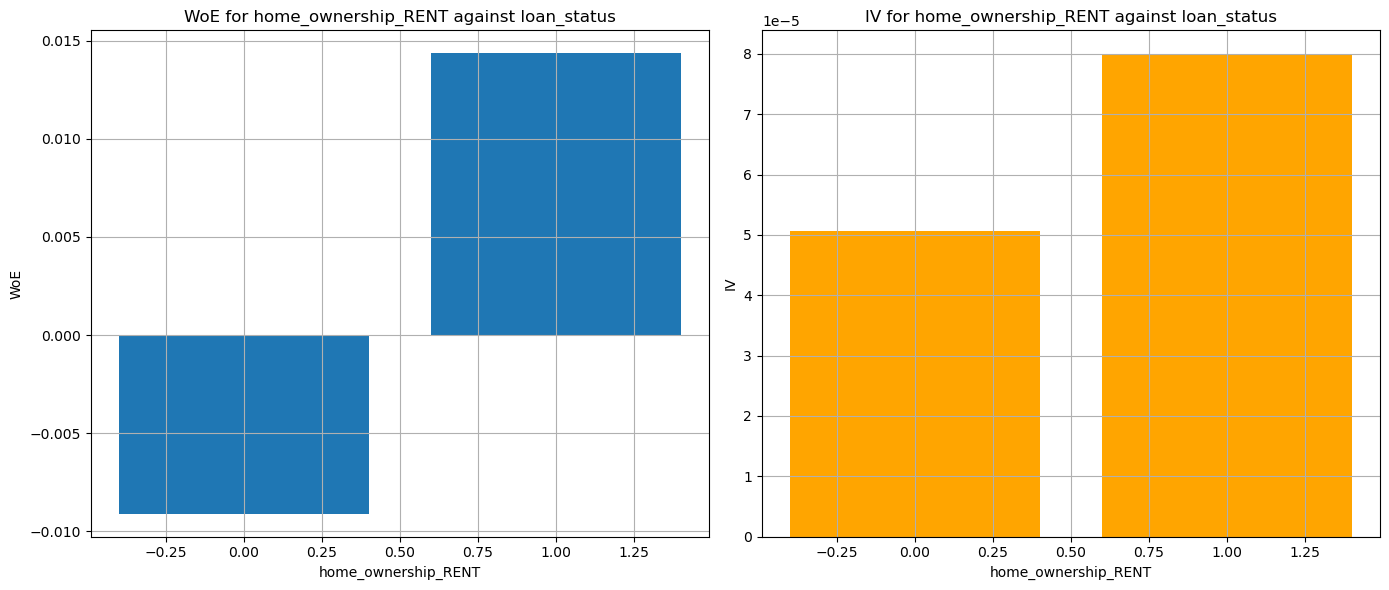

feature home_ownership_RENT iv: 0.00013055580323284273
Showing WoE and IV for feature home_ownership_MORTGAGE against target loan_status
loan_status                     0         1       woe        iv
home_ownership_MORTGAGE                                        
0                        0.502052  0.503366  0.002615  0.000003
1                        0.497948  0.496634 -0.002643  0.000003


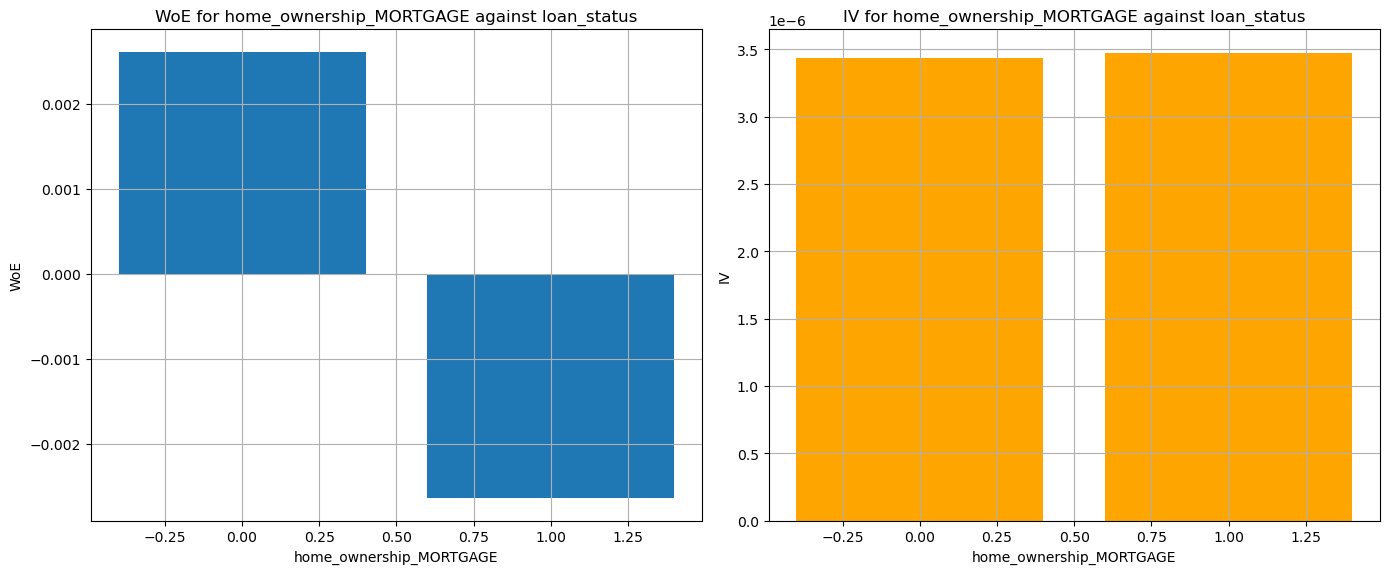

feature home_ownership_MORTGAGE iv: 6.9116123671354614e-06


In [114]:
show_woe_iv(train_df, 'home_ownership_RENT', 'loan_status')
show_woe_iv(train_df, 'home_ownership_MORTGAGE', 'loan_status');

In [115]:
train_df.drop(columns=['home_ownership_MORTGAGE'], inplace=True)
validation_df.drop(columns=['home_ownership_MORTGAGE'], inplace=True)

Checking now the matrix of correlations, we notice there are no strong correlations.

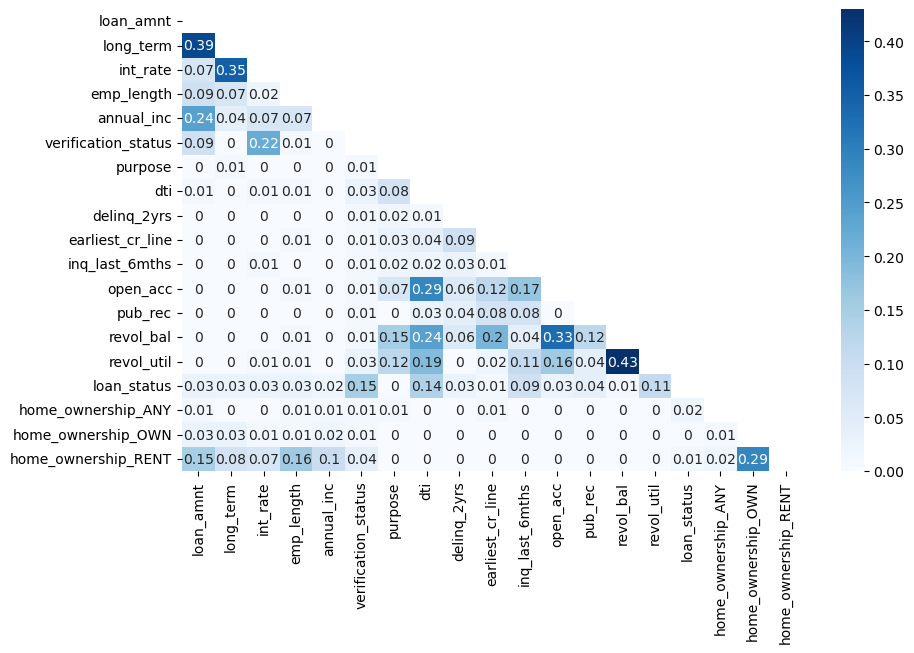

In [116]:
show_corr(train_df)

Another useful metric we can use to determine multi-colinearlity is the Variance Inflation Factor. 

In general terms,
VIF = 1 => variables are not correlated
1 < VIF < 5 => variables are moderately correlated 
VIF > 5 = variables are highly correlated

The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required. When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.
https://www.investopedia.com/terms/v/variance-inflation-factor.asp

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
 
def calculate_vif(data):
    vif_data = add_constant(data)
    vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(1, vif_data.shape[1])], index=vif_data.columns[1:])
    return vif_values
 
calculate_vif(train_df)

loan_amnt              1.299563
long_term              1.386158
int_rate               1.251360
emp_length             1.040192
annual_inc             1.077795
verification_status    1.111865
purpose                1.030288
dti                    1.180653
delinq_2yrs            1.029673
earliest_cr_line       1.075014
inq_last_6mths         1.056882
open_acc               1.439030
pub_rec                1.039431
revol_bal              1.648759
revol_util             1.485297
loan_status            1.082884
home_ownership_ANY     1.001917
home_ownership_OWN     1.103805
home_ownership_RENT    1.169493
dtype: float64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 5.6 |</span></b> Standardization </b></p>
</div>

We now move on to the last step which is normalizing all non-binary variables.

In [118]:
train_df.head(5)

,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,loan_status,home_ownership_ANY,home_ownership_OWN,home_ownership_RENT
229935,24000,0,5.32,0,200000.0,1,8,26.50,0,2012,1.0,10,0,9234,42.2,1,0,0,0
29596,16500,1,15.02,10,73300.0,1,2,20.74,0,2014,0.0,6,0,7081,23.5,0,0,0,0
149904,10100,0,10.75,4,22000.0,0,2,19.39,0,1989,1.0,15,1,3740,55.0,0,0,0,1
249047,10000,0,9.99,0,163000.0,0,5,23.35,0,1995,1.0,9,1,14159,68.7,1,0,0,0
94943,39600,0,5.32,1,108000.0,1,3,17.73,0,2003,0.0,18,0,22535,66.3,0,0,0,0


In [119]:
from sklearn.preprocessing import StandardScaler

#seperate variables
X_train = train_df.drop(columns='loan_status')
y_train = train_df.loan_status

X_validation = validation_df.drop(columns='loan_status')
y_validation = validation_df.loan_status

#scale
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns = X_validation.columns)

X_train

,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,home_ownership_ANY,home_ownership_OWN,home_ownership_RENT
0,0.925294,-0.653154,-1.603419,-1.381472,1.246053,0.127471,2.550578,0.922328,-0.368688,1.569842,0.441850,-0.286672,-0.394534,-0.309979,-0.206699,-0.02902,-0.35998,-0.794415
1,0.109687,1.531032,0.611257,1.154595,-0.077761,0.127471,-0.287269,0.266912,-0.368688,1.836467,-0.685638,-0.998631,-0.394534,-0.553279,-0.968079,-0.02902,-0.35998,-0.794415
2,-0.586298,-0.653154,-0.363657,-0.367045,-0.613765,-1.179121,-0.287269,0.113299,-0.368688,-1.496346,0.441850,0.603278,1.123494,-0.930828,0.314460,-0.02902,-0.35998,1.258789
3,-0.597173,-0.653154,-0.537178,-1.381472,0.859462,-1.179121,1.131654,0.563897,-0.368688,-0.696471,0.441850,-0.464661,1.123494,0.246571,0.872262,-0.02902,-0.35998,-0.794415
4,2.621758,-0.653154,-1.603419,-1.127865,0.284799,0.127471,0.185705,-0.075589,-0.368688,0.370029,-0.685638,1.137248,-0.394534,1.193101,0.774545,-0.02902,-0.35998,-0.794415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226983,-0.814669,-0.653154,-0.724398,0.393775,-0.174932,1.434064,-0.287269,-1.039370,-0.368688,1.969779,0.441850,-0.286672,-0.394534,0.460264,-0.512066,-0.02902,-0.35998,-0.794415
226984,0.272808,-0.653154,-1.603419,-1.381472,-0.112241,-1.179121,-0.287269,1.203384,-0.368688,-0.029908,-0.685638,-0.998631,-0.394534,0.031297,0.770474,-0.02902,-0.35998,1.258789
226985,-0.488426,-0.653154,-1.226696,1.154595,-0.216725,0.127471,-0.287269,-0.065348,-0.368688,-0.029908,-0.685638,0.959258,-0.394534,1.459002,-0.007193,-0.02902,-0.35998,-0.794415
226986,-0.162183,-0.653154,-0.199269,1.154595,0.044485,0.127471,0.658680,-0.767417,-0.368688,0.903279,2.696825,-0.642651,1.123494,-0.888903,-0.695285,-0.02902,-0.35998,-0.794415


## <b>6 <span style='color:#e61227'>|</span> Model building | Fitting | Predictions | Performance Valuation</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:160%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>6.1 |</span></b> Logistic Regression</b></p>
</div>

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def plot_confusion_matrix(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    

We will now use the logistic regression model as our first model to try and predict our target variable.

In [121]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install -U threadpoolctl

#fix NoneType issue in SMOTE...
print("-------------------------------> Setting number of threads...")
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

-------------------------------> Setting number of threads...


In [122]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Before", Counter(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
print("After", Counter(y_train))

Before Counter({0: 153763, 1: 73225})
After Counter({1: 153763, 0: 153763})


Due to the big descrepancy in the amount of rows that we have for both cases, we are going to use SMOTE to balance it out, and help our model to have more data on the charged off cases, allowing it to make more accurate predictions

Accuracy: 0.6278339053511868
F1 Score: 0.5101482471209519
Precision: 0.4406301520424986
Recall: 0.6057111200644641
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     42205
           1       0.44      0.61      0.51     19856

    accuracy                           0.63     62061
   macro avg       0.61      0.62      0.61     62061
weighted avg       0.67      0.63      0.64     62061



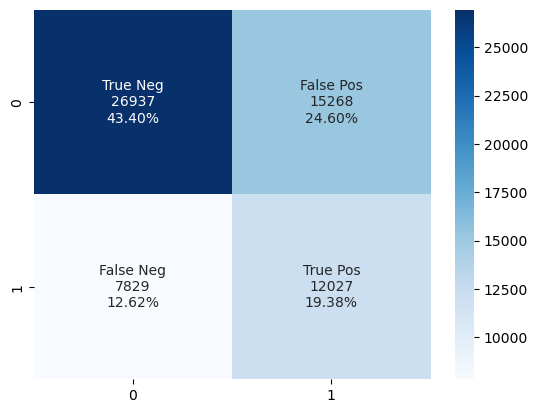

In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
conf_matrix = confusion_matrix(y_validation, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
plot_confusion_matrix(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>6.2 |</span></b> Machine Learning Model </b></p>
</div>

We will now use the random forest classifier model to try and obtain better results than what we got with the logistic regression.

Accuracy: 0.6199062212984
F1 Score: 0.5089205787446653
Precision: 0.43376273111182084
Recall: 0.615582191780822
              precision    recall  f1-score   support

           0       0.77      0.62      0.69     42205
           1       0.43      0.62      0.51     19856

    accuracy                           0.62     62061
   macro avg       0.60      0.62      0.60     62061
weighted avg       0.67      0.62      0.63     62061



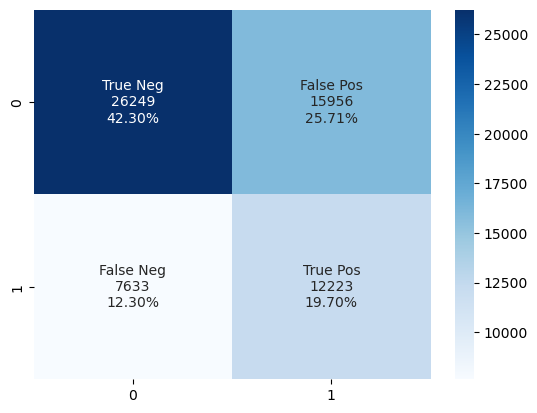

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
conf_matrix = confusion_matrix(y_validation, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
plot_confusion_matrix(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

As the random forest classifier left a little bit to be desired, we chose to implement a gradient boost model to try and beat our logistic regression model

Accuracy: 0.8112502215562108
F1 Score: 0.7176124584156985
Precision: 0.6882456302598724
Recall: 0.749597099113618
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     42205
           1       0.69      0.75      0.72     19856

    accuracy                           0.81     62061
   macro avg       0.78      0.79      0.79     62061
weighted avg       0.82      0.81      0.81     62061



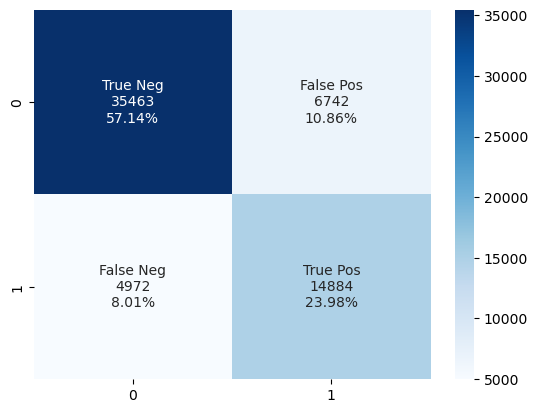

In [125]:
!pip install xgboost

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalidation = xgb.DMatrix(X_validation, label=y_validation)

# Setting hyperparameters
params = {
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Objective function for binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'seed': 42  # Random seed for reproducibility
}

# Training the model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)
y_pred = xgb_model.predict(dvalidation)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

accuracy = accuracy_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
conf_matrix = confusion_matrix(y_validation, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
plot_confusion_matrix(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))


In [127]:
#save model for later
xgb_model.save_model("best_model.json")

As the XGBoost model was the one that obtained the best results, this is the one that we will use for our predictions.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'> 6.3 |</span></b> Deep Learning Model</b></p>
</div>

We will now go to the deep learning part of our assignment, where we will try to develop the best possible model to improve on the previous results.

In [128]:
import tensorflow as tf

# Get the GPU memory fraction to allocate
gpu_memory_fraction = 0.8

# Create GPUOptions with the fraction of GPU memory to allocate
gpu_options = tf.compat.v1.GPUOptions(
    per_process_gpu_memory_fraction=gpu_memory_fraction
)

# Create a session with the GPUOptions
session = tf.compat.v1.Session(
    config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
)

This previous code is used to speed up the process of our deep learning model.

In [129]:
import matplotlib.pyplot as plt

def plot_accuracy_loss_graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo-', color='red', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training & validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', color='red', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training & validation loss')
    plt.legend()

    plt.show()

Our model will consist of a model of 4 layers, the first layer is going to be a dense layer, followed by a dropout layer and then 2 more dense layers.

In [130]:
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import (Sequential, Model) # type: ignore
from tensorflow.keras.layers import (Dense, Dropout) # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

input_size = X_train.shape[1]

"""
Function to create model and return it
"""
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    
    #layers
    model.add(Dense(input_size, input_dim=input_size, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(input_size//2 ,  activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

"""
Function to fit model and return history
"""
def fit_model(model, batch_size=64, epochs=30, callbacks = []):
    return model.fit(
        X_train, y_train,
        validation_data=(X_validation, y_validation),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )


early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

dl_base_model = create_model()
history = fit_model(dl_base_model, 1024, 30, [early_stopping_cb])

Epoch 1/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5325 - loss: 0.7262 - val_accuracy: 0.6148 - val_loss: 0.6637
Epoch 2/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 0.6635 - val_accuracy: 0.6061 - val_loss: 0.6488
Epoch 3/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6182 - loss: 0.6506 - val_accuracy: 0.6158 - val_loss: 0.6366
Epoch 4/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6269 - loss: 0.6451 - val_accuracy: 0.6122 - val_loss: 0.6427
Epoch 5/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6285 - loss: 0.6424 - val_accuracy: 0.6193 - val_loss: 0.6384
Epoch 6/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6325 - loss: 0.6399 - val_accuracy: 0.6197 - val_loss: 0.6405
Epoch 7/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6334 - loss: 0.6378 - val_accuracy: 0.6221 - val_loss: 0.6423
Epoch 8/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6354 - loss: 0.6373 - val_accuracy: 0.

We can see that our model stopped after 9 epochs due to the callbacks.

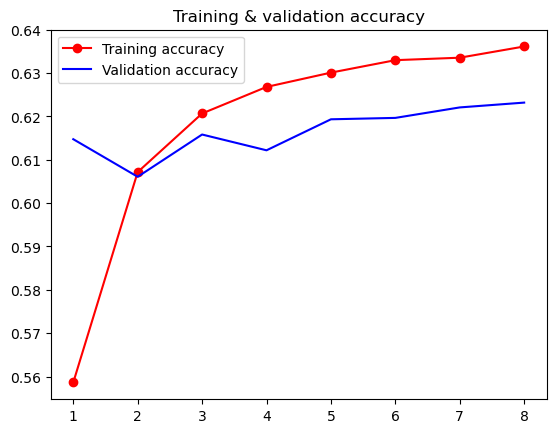

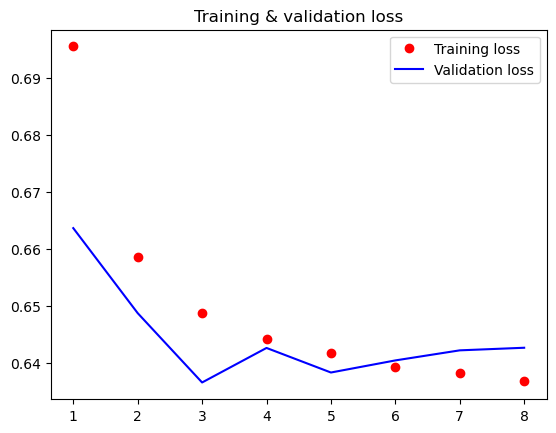

In [131]:
plot_accuracy_loss_graph(history)

In general this are not great results, and the best approach, in our opinion is still the machine learning models.

## <b>7 <span style='color:#e61227'>|</span> Predicting unseen dataset </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> TEXT</b></p>
</div>

We will now generate the predictions for the unseen dataset. We'll start by loading the dataset and pre-processing the data...

In [176]:
#unseen_kaggle = pd.read_csv('unseen_kaggle.csv', encoding='ISO-8859-1')
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,60 months,12.79,905.83,C,VP Technology,< 1 year,MORTGAGE,250000.0,Source Verified,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,36 months,15.59,1223.43,C,Management,10+ years,OWN,108000.0,Source Verified,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,36 months,12.79,268.75,C,Courtroom Clerk,8 years,MORTGAGE,37000.0,Verified,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [177]:
X_train.columns

Index(['loan_amnt', 'long_term', 'int_rate', 'emp_length', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'home_ownership_ANY', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object')

In [178]:
unseen_kaggle = unseen_kaggle.drop(columns=['emp_title'])
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,60 months,12.79,905.83,C,< 1 year,MORTGAGE,250000.0,Source Verified,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,36 months,15.59,1223.43,C,10+ years,OWN,108000.0,Source Verified,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,36 months,12.79,268.75,C,8 years,MORTGAGE,37000.0,Verified,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [179]:
transform_length(unseen_kaggle)
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,60 months,12.79,905.83,C,0,MORTGAGE,250000.0,Source Verified,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,36 months,15.59,1223.43,C,10,OWN,108000.0,Source Verified,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,36 months,12.79,268.75,C,8,MORTGAGE,37000.0,Verified,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [180]:
print(unseen_kaggle['term'].unique())
#Assume worse case scenario and we're risk exposed for longer...
unseen_kaggle['term'] = unseen_kaggle['term'].fillna(' 60 months')
print(unseen_kaggle['term'].unique())

[' 60 months' ' 36 months' nan]
[' 60 months' ' 36 months']


In [181]:
unseen_kaggle['term'] = unseen_kaggle['term'].apply(lambda s: 1 if "60" in s else 0)
unseen_kaggle.rename(columns={'term': 'long_term'}, inplace=True)
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,1,12.79,905.83,C,0,MORTGAGE,250000.0,Source Verified,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,0,15.59,1223.43,C,10,OWN,108000.0,Source Verified,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,0,12.79,268.75,C,8,MORTGAGE,37000.0,Verified,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [185]:
#for unseen verification status, assume it's not verified (worse case)
unseen_kaggle['verification_status'] = unseen_kaggle['verification_status'].fillna('Not Verified')
unseen_kaggle['verification_status'] = verification_status_encoder.transform(unseen_kaggle['verification_status'])
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,1,12.79,905.83,C,0,MORTGAGE,250000.0,1,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,0,15.59,1223.43,C,10,OWN,108000.0,1,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,0,12.79,268.75,C,8,MORTGAGE,37000.0,2,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [193]:
#for purpose, assume it's the most common case (mode value)
unseen_kaggle['purpose'] = unseen_kaggle['purpose'].fillna(unseen_kaggle['purpose'].value_counts().index[0])
unseen_kaggle.purpose.info()

unseen_kaggle['purpose'] = purpose_encoder.transform(unseen_kaggle['purpose'])
unseen_kaggle.head(3)

<class 'pandas.core.series.Series'>
RangeIndex: 20600 entries, 0 to 20599
Series name: purpose
Non-Null Count  Dtype 
--------------  ----- 
20600 non-null  object
dtypes: object(1)
memory usage: 161.1+ KB


,id,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,1,12.79,905.83,C,0,MORTGAGE,250000.0,1,42644.0,3,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,0,15.59,1223.43,C,10,OWN,108000.0,1,42644.0,2,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,0,12.79,268.75,C,8,MORTGAGE,37000.0,2,42644.0,2,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;


In [195]:
unseen_kaggle.drop(columns=['grade'], inplace=True)

In [196]:
unseen_kaggle = pd.get_dummies(unseen_kaggle, columns=['home_ownership'], dtype=int)
unseen_kaggle.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,long_term,int_rate,installment,emp_length,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,924308,40000.0,40000.0,40000.0,1,12.79,905.83,0,250000.0,1,42644.0,3,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;,0,1,0,0
1,924309,35000.0,35000.0,35000.0,0,15.59,1223.43,10,108000.0,1,42644.0,2,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;,0,0,1,0
2,924310,8000.0,8000.0,8000.0,0,12.79,268.75,8,37000.0,2,42644.0,2,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;,0,1,0,0


In [201]:
unseen_kaggle.earliest_cr_line

0        35947.0
1        38777.0
2        34820.0
3        30956.0
4        37288.0
          ...   
20595    37622.0
20596    30348.0
20597    32629.0
20598    41306.0
20599    37288.0
Name: earliest_cr_line, Length: 20600, dtype: float64

** THERE IS AN ERROR IN THE UNSEEN DATASET AS EARLIEST_CR_LINE IS NOT A YEAR **

In [209]:
unseen_kaggle.earliest_cr_line

0        35947.0
1        38777.0
2        34820.0
3        30956.0
4        37288.0
          ...   
20595    37622.0
20596    30348.0
20597    32629.0
20598    41306.0
20599    37288.0
Name: earliest_cr_line, Length: 20600, dtype: float64

In [211]:
unseen_kaggle.drop(columns = ['addr_state', 'issue_d'], inplace=True)

In [214]:
unseen_kaggle.drop(columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)

In [217]:
unseen_kaggle.drop(columns=['installment'], inplace=True)

In [222]:
unseen_kaggle.drop(columns=['total_pymnt;', 'out_prncp', 'total_acc', 'home_ownership_MORTGAGE'], inplace=True)

We now will scale the data to introduce it to the model, ignoring id feature...

In [229]:
unseen_kaggle.loc[:, unseen_kaggle.columns != 'id'] = scaler.transform(unseen_kaggle.loc[:, unseen_kaggle.columns != 'id'])
unseen_kaggle

,id,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,home_ownership_ANY,home_ownership_OWN,home_ownership_RENT
0,924308,-1.684360,2.690904,-2.794753,-1.731823,-0.843612,-1.012568,-1.145384,-2.262324,0.400920,336.654695,-1.458687,-2.307678,-0.993449,-1.353620,-2.002936,-1.029862,-1.489566,-2.425509
1,924309,-1.684419,-2.079765,-2.648793,-1.088659,-0.843628,-1.012568,-1.369089,-2.312949,0.400920,386.950080,1.083771,-2.275998,-0.993449,-1.353543,-1.848931,-1.029862,8.356917,-2.425509
2,924310,-1.684739,-2.079765,-2.794753,-1.217292,-0.843635,0.694616,-1.369089,-1.909760,2.737076,316.625402,-1.458687,-2.180957,1.310962,-1.353580,-1.945578,-1.029862,-1.489566,-2.425509
3,924311,-1.684808,-2.079765,-2.794753,-1.538873,-0.843636,-1.012568,-1.592794,-2.184897,1.568998,247.953542,-1.458687,-1.737431,-0.993449,-1.352800,-1.936294,-1.029862,-1.489566,1.790134
4,924312,-1.684774,-2.079765,-2.862520,-1.410241,-0.843631,0.694616,-1.369089,-1.928146,-0.767157,360.487243,-1.458687,-2.022555,-0.993449,-1.353368,-1.933310,-1.029862,-1.489566,-2.425509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,944903,-1.684772,-2.079765,-2.983459,-1.088659,-0.843630,-1.012568,-1.369089,-2.179588,-0.767157,366.423165,2.354999,-1.990874,-0.993449,-1.353470,-1.955690,-1.029862,8.356917,-2.425509
20596,944904,-1.684682,2.690904,-2.805179,-1.088659,-0.843635,-2.719751,0.644255,-1.933454,-0.767157,237.148032,-1.458687,-2.117596,-0.993449,-1.353475,-1.921872,-1.029862,-1.489566,-2.425509
20597,944905,-1.684644,-2.079765,-2.748880,-1.474557,-0.843632,-2.719751,-1.369089,-2.101903,-0.767157,277.686467,-1.458687,-1.990874,-0.993449,-1.353134,-1.933476,-1.029862,-1.489566,-2.425509
20598,944906,-1.684538,-2.079765,-3.050184,-1.152975,-0.843622,-2.719751,-1.369089,-2.185674,0.400920,431.896026,1.083771,-2.212637,-0.993449,-1.353618,-2.000284,-1.029862,-1.489566,-2.425509


In [246]:
if xgb_model is None:
    print('XGB is not initialized, loading model from json file')
    if 'best_model.json' in os.listdir():
        xgb_model = xgb.Booster()
        xgb_model.load_model("best_model.json")
    else:
        print('XGB is not initialized and no model file was present!')
        assert False

print('XGBModel is present, continuing...')
d_unseen = xgb.DMatrix(unseen_kaggle.loc[:, unseen_kaggle.columns != 'id'])
unseen_kaggle['loan_status_prob'] = xgb_model.predict(d_unseen)
unseen_kaggle['loan_status'] = unseen_kaggle['loan_status_prob'].apply(lambda p: 1 if p >= 0.5 else 0)
unseen_kaggle

XGBModel is present, continuing...


,id,loan_amnt,long_term,int_rate,emp_length,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,home_ownership_ANY,home_ownership_OWN,home_ownership_RENT,loan_status_prob,loan_status
0,924308,-1.684360,2.690904,-2.794753,-1.731823,-0.843612,-1.012568,-1.145384,-2.262324,0.400920,336.654695,-1.458687,-2.307678,-0.993449,-1.353620,-2.002936,-1.029862,-1.489566,-2.425509,0.332156,0
1,924309,-1.684419,-2.079765,-2.648793,-1.088659,-0.843628,-1.012568,-1.369089,-2.312949,0.400920,386.950080,1.083771,-2.275998,-0.993449,-1.353543,-1.848931,-1.029862,8.356917,-2.425509,0.687761,1
2,924310,-1.684739,-2.079765,-2.794753,-1.217292,-0.843635,0.694616,-1.369089,-1.909760,2.737076,316.625402,-1.458687,-2.180957,1.310962,-1.353580,-1.945578,-1.029862,-1.489566,-2.425509,0.803341,1
3,924311,-1.684808,-2.079765,-2.794753,-1.538873,-0.843636,-1.012568,-1.592794,-2.184897,1.568998,247.953542,-1.458687,-1.737431,-0.993449,-1.352800,-1.936294,-1.029862,-1.489566,1.790134,0.344046,0
4,924312,-1.684774,-2.079765,-2.862520,-1.410241,-0.843631,0.694616,-1.369089,-1.928146,-0.767157,360.487243,-1.458687,-2.022555,-0.993449,-1.353368,-1.933310,-1.029862,-1.489566,-2.425509,0.523205,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,944903,-1.684772,-2.079765,-2.983459,-1.088659,-0.843630,-1.012568,-1.369089,-2.179588,-0.767157,366.423165,2.354999,-1.990874,-0.993449,-1.353470,-1.955690,-1.029862,8.356917,-2.425509,0.565417,1
20596,944904,-1.684682,2.690904,-2.805179,-1.088659,-0.843635,-2.719751,0.644255,-1.933454,-0.767157,237.148032,-1.458687,-2.117596,-0.993449,-1.353475,-1.921872,-1.029862,-1.489566,-2.425509,0.358583,0
20597,944905,-1.684644,-2.079765,-2.748880,-1.474557,-0.843632,-2.719751,-1.369089,-2.101903,-0.767157,277.686467,-1.458687,-1.990874,-0.993449,-1.353134,-1.933476,-1.029862,-1.489566,-2.425509,0.167918,0
20598,944906,-1.684538,-2.079765,-3.050184,-1.152975,-0.843622,-2.719751,-1.369089,-2.185674,0.400920,431.896026,1.083771,-2.212637,-0.993449,-1.353618,-2.000284,-1.029862,-1.489566,-2.425509,0.745667,1


In [247]:
unseen_kaggle_results = unseen_kaggle[['id', 'loan_status', 'loan_status_prob']]
unseen_kaggle_results

,id,loan_status,loan_status_prob
0,924308,0,0.332156
1,924309,1,0.687761
2,924310,1,0.803341
3,924311,0,0.344046
4,924312,1,0.523205
...,...,...,...
20595,944903,1,0.565417
20596,944904,0,0.358583
20597,944905,0,0.167918
20598,944906,1,0.745667


In [248]:
unseen_kaggle_results.to_csv('unseen_kaggle_results.csv')